#### COMPANION WORKBOOK

# Feature Engineering

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Leverage Domain Knowledge

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns',100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')


In [2]:
df= pd.read_csv('cleaned_df.csv')
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [3]:
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)
print(df.two_and_two.mean())

0.09458023379383634


## II. Create Interaction Features

In [4]:
df['recession'] = ((df.tx_year >= 2010) & (df.tx_year < 2014)).astype(int)
print(df.recession.mean())

0.2635494155154091


In [5]:
df['property_age'] = df.tx_year - df.year_built
print(df.property_age.min())

-8


In [6]:
sum(df.property_age < 0)

19

## III. Group Sparse Classes

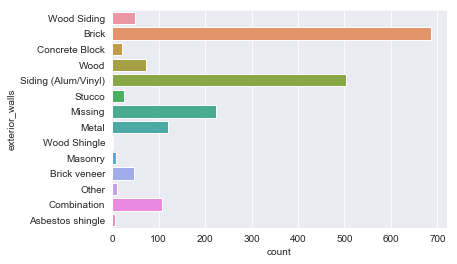

In [7]:
sns.countplot(y='exterior_walls', data = df)

In [8]:
df.exterior_walls.replace(['Wood Siding','Wood','Wood Shingle'],'Wood',inplace = True)

In [9]:
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']
df.exterior_walls.replace(other_exterior_walls,'Others', inplace = True)

## IV. Prepare Analytical Base Table

In [10]:
pd.get_dummies(df,columns=['exterior_walls']).head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,recession,property_age,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Others,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,0,0,0,0,0,0,0,1
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,1,0,0,0,0,0,0,0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,0,0,0,0,0,0,0,1
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,0,0,0,0,0,0,0,1
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,1,0,0,0,0,0,0,0


#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 3.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

#### A.) First, check that you've correctly created the <code>'two_and_two'</code> indicator variable for properties with two bedrooms and two bathrooms. Display the proportion of our observations that meet that condition.

In [11]:
df.two_and_two.mean()

0.09458023379383634

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
0.09458023379383634
</pre>

#### B.) Next, print the number of observations with <code style="color:steelblue">'property_age'</code> less than 0.

In [12]:
(df.property_age < 0).sum()

19

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
19
</pre>

#### C.) Next, display the names of the unique classes left in the <code style="color:steelblue">'exterior_walls'</code> feature after grouping sparse classes.

In [13]:
df.exterior_walls.unique()

array(['Wood', 'Brick', 'Others', 'Siding (Alum/Vinyl)', 'Missing',
       'Metal', 'Brick veneer', 'Combination'], dtype=object)

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
['Wood' 'Brick' 'Other' 'Siding (Alum/Vinyl)' 'Missing' 'Metal'
 'Brick veneer' 'Combination']
</pre>

## <span style="color:RoyalBlue">Exercise 3.2 - Housing Market Recession</span>

Because we're modeling housing prices in the United States, it's important to consider the **housing market recession**. According to data from Zillow, the lowest housing prices were from 2010 to end of 2013 (country-wide).

<p style="text-align:center; margin: 30px 0 30px 0">
<img alt="Zillow Housing Prices" style="width: 480px; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19); margin-bottom: 15px"  src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAyAAAAGgCAIAAADdPZTOAACQHklEQVR4AezYAQYDMRBA0b3/jRZA&#10;LpUgMyUIRbQoydZ7oFLWGMGXKwEA+KkrAQAQWAAAOwgsAACBBQAgsAAAEFgAAAILAEBgAQAILAAA&#10;BBYAgMACABBYAAAILAAghtwGgRXL8/3igR//g11ZKa6QPcdXhzNl+hDDCXdjOcYcON7kCQQWADBL&#10;5cxnqtZardVjm8ACgIfV1fqvbZPM36WU+75z6L1/mjlO2afAAoAXe3cB3UTy+AF8/u7+c3cX5Ax3&#10;uAMO1xoOh7u2aFucw52juJNej8Paq6dOPU0jTZO0kaZx2ewm2d35Tza9udAj0Nd3wtH5vH286Vhm&#10;l8r3TTYJSVcuiyHn0b2UlAsXUi7evPWhQqPnhWaO58OfQQz154VyCB8SXhEaiIWNCqsJGyu0hvdE&#10;cP3Dhw9v3ryJ++A1c4ynqjD7zp07olRRaqro6rXrZXUqoZljOQ4/Fp4tKHyFqJ+Ab/e4uFf7U+Fx&#10;3bMqEVzLIyRgEQRBEEQXhYOApv5J1IAfdBs4dv/BY0fe3ztq6IiLaTlspL2lzuziRMgcoUrel/dJ&#10;ptZMh4/F/TMyMlJTU/EOFv6XatWufAd8a8j05OTkrVs2LVqy7OO8ykCHn7bjnrHCsGVjfIf3qHhf&#10;SW6mutWO+5CARRAEQRBdD04qFt3St385auEOg8UNBZTb5fb6eNZvMhqcHhoKAj7aaDB4fQE0ztJq&#10;9lCM226urakx2Vw05bbYHH6fr6lRWS9Tev3Bab0uu0wqqauX210UFHicdqvVTrlcjUp5Ta3EaLZD&#10;gbJaPKrfiNuPi/R6ncPjbZeK0tPTRSLR5wOWx6ReE/vOnXwpKrMBP8uyQj3Cm/RNtdU1MnkjxbBQ&#10;wHjdrRabPxDQqZVSmdLD+IUVOhQyaW1dvc3pCQ9TrYbmOomkXiZvtQZXyPmZFn1TXR2qUTrcNL54&#10;Rp1WIpFI6+X6Fgsaqaktihs/5NrjHJ3BaHN4cHwkAYsgCIIguuKzgxWZNwDoLW2ytdux8du1q9+b&#10;/aBQAQU2fePySeNKVQYIA1cOH4jfumtv4noAfp5d1aCSl2/esu3ggQOxYwbHLt9h9gYcxsb4BTHD&#10;350wbuTQmUu21Gtb0Qyy4ozV82ZuXJ+wbtWq6eNH9h4ZVypr9nutR3fMB+Bbs+cs3LQ1uUZjCD17&#10;x/PwhQFrdew798s1MBznE9+/MXrwoHkLl0wYMXRD8km9JZh1dI2Vq1atOXnqTNTAP0Yt3653UJRN&#10;v33JjGEjx08cO2LqnPV1jUaI8P7CR3fGDOw/fuLEbn9+LSUtB9XV5t0bPWDgnAWLhr3VY/76fc3W&#10;YF4sy0qbGT193sLF7wzutTL5VINaf3nvJgDAvIXvrdq0q7y+ue351S4VsAiCIAiC4Nv2ezjRie2T&#10;Vu5x+CASYDme51mWRWWfTT197KA7WXVQYG1WTf4fkC1RofKZeBSJwK3HYp3B5Gc5jaIMfTlgVrxE&#10;obY5XIzHdmTD7CXbTzho1udq3b9h1oJtZ3gItZWZqNuWI1dbbS6XRb9zwaCJG07SLNTKi0aOjc4s&#10;rnc5HRTN4PD3ooClWRM96NSHOXa7w6jXN+sMLAdVldn/AsCle/keL6NXVsUMAOsO3kCdLfpaAEDf&#10;uHUVEoXN6WYo+9nklfPWH2h1+1jacXTLvLgNx3wQGmQlqNs5UZbZYlGrGpqNtmA4UytrpUo/Dy1a&#10;yejfg5u5Uui3zegHdp67H+Cgw2KUSGVeP99UU7xo2rjHJdVOl9tD0TCoi+5gEQRBEAQJWIGr++Jj&#10;Eo46/BDhwu5/8tk0C2InpaE8IbDqVLP79Miv16DysTVzV+05G4BtNLKCP/2sX7G0GQpsTbX9v/9v&#10;564/aFRrNWrlhSMbwf9FWT1cc3XmW4OmKlo8UFCZe+PteXspFvrc2ulRCyUa1+fuweKfE7Aoc/Om&#10;mF6/GjZ1x7Yd61YtXbQiSaHSfnjh4MxV+2gehlRn3/lt76kmmrcZJN2+9cecikYocBpkk3r97vD5&#10;VJVao1Grbp7bDsCUVqsrN/Xk4JmJFAfboZzWRrVGKSldHDfslKgYsvSJpMUT5sVXSZQBHoa4DKot&#10;i6Irta34JLrsPVgEQRAEQQIW//HZxHFLku0MRPwBFtUHAgFU9lnVc6PGpebggKWe89Zf8qTBgHV4&#10;1bzj19JQgfUHc1mjNG/40PmqZisUmJRlIwf1nLt4zcb1a9Zv2DBvblzi/hSvHzaWPhwbt0RhoqCg&#10;XCyavvwQFYAus3zylLll9S3BCVkOCl58D1ardl3MoL0paQ0Nqprq8po6JeV1phxPTtp7KYDaeRb1&#10;aaopGD9ustrut+hqhvWaIlW1QkFrY+WsSYMnz1q6NWH9qjVrFy+atXn3ebfL9fDqnoW7rvnRUI5l&#10;GB/Hw4DX+eDWB1HRsZu2JB3dn/inX//w1O384NUwqE7s3dyrW7cJUYseiauCsVJbv3b25GJZ8PoI&#10;F5AELIIgCILowvdgVWXdAuBbpXIjDCfsYM2JmfSgSAkFDoNy/O9+KK7XovLRNQsOXbwDESHrNNbn&#10;Dxs0R67G8aWs+2///KhYzvGcy+X0emm/Pxg46sUfTZ65RGZ0Q0F5/t1pyw6igOW2KqbFLKzV2Nvt&#10;YPGQf8FN7nEj75erYZgrh7Ys2nzCB9vICu//9c3xRg9r0dcOfWNi9afnaNVWjez/lii7muN5t8vp&#10;obwBlkcTf3g+ceqaI374mbqyjJ+DHo/zK/085NymnSuiDl7JxK2WFt31swf/4UfvKgxOb6t63dzp&#10;5WpTKL2SgEUQBEEQXfpVhF6HYUNMDzBodqVMzfj8Xspj1OuclJ/3OVZGDYw/fJ3hIWTpeyl7AAAl&#10;ymY05NCKWQcu3PosYEnzeveMwQHL5zFtmDFgWdJ5F8OHXqxnNFlRQS5OGzV9AQ5YT/LujFu4HwUs&#10;j6Wh29/+6IG4NrT3g8Z0MGCtmDrwZq4k9CpCf4BFBan4/r+Cnz4srg8+rl2XMHNg7PrjqNyiqej9&#10;m1E4YLFeS9LSCXM2HrNRwVG0G63QFhxedB8A8Kikjud5p93O0FRR5i3wn2O0Zgq1KsoyUeuJO4U8&#10;xxp1TQ63T0iTNf8JQKFE57c3TesJbmZXBc/CH+BJwOriCIIgCPI+WCZt/dal0eDvf7M+fvv2+LX9&#10;B41Kf6JC9WXp178LwKqEnft3J8+YPO7X3/95oUyLxh1YMnN/yl2ICM/oqepyXns9SqE14/TTJCuL&#10;Gdy9/9jYvTuTJwzpt/uDNFSpFKcOnzJfYfK0Bazc22MW7HEyEAY8p3esBD95a8/BE7Im/CrCF9yD&#10;5W5pXDrhjVv5Utg2gIOIn0o9//5fewzee+DQ8jmTx89cJdWYg+tpKHnrz6NrFC2oHBDWrG+oXjCu&#10;3+sjpuzeuTtqRJ9tJ257UTVL3T6z62d/6L09MWlOzCzRgwK7UbM2etjIqAW7dmxfs3zZv4HfXbhX&#10;FqCsx5NWTpu94sihg3OmjF+beNxKcZD1pByI//dv/WnrvtM1Cj0kryIkCIIgCJKxGMpZW1GWl5tb&#10;KC54Ul5tdlAQYRm1vC77k8yi0kp9i6lZ02h1oXq+Wd2oM5rxWz1RLqtC2UjR/vB7p+ytxpICcV5u&#10;XklphU7YwXJbTQ0qNeVjocBhMzWom31ssL/HbikpyM8XF1ucHmESBEYKWKG2AEOpGxQmmzu0DFzP&#10;BRiltDY7M0tcWGayuaDA63EoFA1uyhe+QqfVVFZUEFxhyZNmozmUhng/LZdUZ2dliQuKdcbgsq3G&#10;psK8nJzcgmZDq1GnN5hsPMc2q5WF4vycrJySsqrgNRFQTlt5kTg7vyS0Kp68DxZBEARBdFm8oOOf&#10;qYercaxpNyTSdJEeERdx6/Nvcsetzy1jfAdXiHDPru7kW9d3/Oq/igGLIAiCIAie/+yj9yDP8WGf&#10;HogLiFD9rIQUAsNrcO9Q8bNuz4hZ+FMOcU3kgIU9PR8WOpOwNURc4tMfksjj4fiUQ3AFJ8BlPBav&#10;qt1ZdDZg4QflI1zniPURr3CEmo4hAYuPXP+1478pk79a14pcUoJ8C5HrzHegMnJQCq/u+A4O9swo&#10;0MGNtEg3uXd+W67jZxwhwXRkLC/oeKjFqRBnwQiRCBcwXP+shUVKcmQHiyAIgiDIzWGdDlgvOXwD&#10;vKPVWF0j5z4XjGjK43K5Amz7/TyeDbicTtrnb/ecJhfwuV0uN+XF8wcr2SA+fG6eZxiG43gSsAiC&#10;IAii64n8Tu6vyqmFcFmiyzGz4mVqk49hhDjFm3TqO5fPLpw/a8LE8Zu276+Sa/FAnbJm37YN48a+&#10;O2vJ2syimlB0ohzmgox7yZvXx0VPnxY94+Slu3qzAyJ8oOSx6INrD9wMDHFb9acOJN28n+/j8DJI&#10;wCIIgiCIrufVC1g41xhUdcnrF4H/+JfuvYe8PXTg3OXJ6hY3hPTJ7UvfGjf7Xnp2SWH+xgXjQLdx&#10;kiYz6m8zKOP6gzHzEopKn1w7ngzA36WXKlG9vPTx8N59D525UlRcmp52oycA87efcHPBq3V174pe&#10;cTssnuAXjNOya8k4MGS2TGfDyyABq8shCIIgyA7Wqxew8ClwXtuuJZNmrt5z/cqVtfF78gpLxGKx&#10;0epBTTqt2mz3QIHT2DDqP8DFT8pROef2MfDXSQ0toSbmePycqHXvUxzkfVRLixmnpSePrgDQV95C&#10;o/KtownjFu9DfSDrPrguBvSOlutDm1tcJ+7HAuR7MXL9y7O2l2Dyl8Ar8v9FEPwX+i1E8J2/zh2/&#10;9/zl//XCC3DACpVxwOIh36lLy78kAYuxaGN+D86mFigqynbtTWE+beJxN5YVtp2MsT1/cD2nBpWP&#10;b52/ck9K4NNvhdqsW93eni03uODTMq8dAX8ap7YFO14/uGFWwhm3h36QkgTA8BpVS3i6IgGLIAiC&#10;ILqu+/fv37hx4xXJ7vgztnnm3oWD//W9P0+aFL0s4ajeSofHSpSuQlGrIuM6AH+Q6lwQepPXzT1w&#10;Ng1HNE1VxusDp9Uog5nJ73XJ6moryp/cTjk+oPdwUUYJDPKLTiXHLEo4e3Qf+M7vCmq1+P0wYKeA&#10;ryWP+3w+mqYZhhH+7SSaoTteH7m1k3060znyDOh4/pyf7/AVnwhu7fyEnezZiUePfBlputPfThH+&#10;j75gkefHlV/8SvAMX1z/L36eSN//uPCNhs8Cnx2u+cLh7yJc+EJmYyL7Gn6COvEQNO7f+am+mJ50&#10;Z3+HCwKBQG1tbXl5OcP4/H6WoX0+xv8yH2iFaPHPD4KhVsZtS0+9OnnkIADArAXrc0tq/RxEuCCI&#10;tKgqegGw/9J9iDDWxOUzDp37GAcsdXVmt7++UynToTJt1e7fvGL0qNEA+dXYklq1MJHv0cX3QZte&#10;4moV3r76BgQsvGPp9Xo9Hg9FUZ4vCEEQBEEQKGM1NDTIZDKbq8Xq0lucOqtwWIQDF8KP9n0iH5bI&#10;9c+f1vpUJS4El2dzmSgv1fH3QajIeTRzyqxVy5f++3f6iYVgxAkflWjRSSf+EizadtJBs0JYsu/e&#10;+N775z4K38F6s8+UaoURlQM+r9ViNpstxqbGc/vj//ONifUGJ6r/8MQW8GZUWVXd+V3LARgpNzhC&#10;w3nyPlgEQRAE0cU9evTo1q1bTn+TPSA301IrI7Mw9aEDlfG/YV/Wt+sTOsK+xJ2D9fjANXjsU5Pj&#10;4+kJw1plZkbi9uthmxdvYiHy0txjZ9NaDC2L+oMDNzOhwNQkjX3jv+fHH7VRARjC0yd3LF29T7gH&#10;Sxgryb771yEzZXonfJrbpB4AwLU8CSrfObxuzLKDLIQBu3bst8D09YddPnwfGAlYXRpBEARBXkWY&#10;cffuXaev2R5QmL0ox8hf2sNCS1HA4tuiFf+c87Ib9ddSLheUlX90/cKS99Ye3re7Z4/BORUNqMmq&#10;l6+ZOTHx6HUaPkUsOgW6T2k0UzDIf2bLgtGLdjoYDvJP7Ujp60v/C4CHT4JTiU5sjV590EYF25Xl&#10;2QCA47dzoIDjeBKwCIIgCKLrfgR1RkaGSCQKBiz/yx6wzLTU1bGA5WzVH4pfM++9RXNnRb3Z87U5&#10;i1en5z9BDbTduHgwQHYf+0AkunPp4oVzZ8+mpeeyEHrNmoUjfj1mfnxBccm1E8moz71CKZqq7PGt&#10;pF0HHqRno5vc0ftgvftrMGru5lYPByF/MWn+LydvsXna1pN39zQalZZbgy8wCVhdFEEQBEF2sDLS&#10;hYD1jdjBenHAwngfw9Ae5/2r56bP26a3MVBgbW48tisxMXn37uTEtWvXxifEL1u85MSl224WIs2K&#10;6oOJm1csW7F85Ya0zBJaqGyoFCfGr121ZuOW+IRly1eeunCnqcUGg9iSdNHpK/c8vrbF8Izr1v+z&#10;dx9wTZ5r/8Cv/3r3me95zx4dp3vvvayt3a2109Vql61tbV2tHVZlD2WqoAIOFBGQLSDgYMkSQfbe&#10;e4bs8dz53+HBp6mxOZQjkoTf9+TjwaxGCMkv1309171zi++uGIVGwCR3RwMAAICAJRloa8rMPKUZ&#10;u67BIBgZMxj0Op2W0+k5/rVObzBI3w2m18lGZEqV1vy7xAx6hVw+NDQkV6qN48b3IuT3IN7UfC9C&#10;g8HherAAAAAAAYsxJggGjn9h5F8bhLEvrN+Em9iAcUGQLvmx62OSu6MBAABAwLIavASD6NwX3w9W&#10;kC7l5zBmfhPxatJ1paQl/V0kXke8KQLWxd9dYRowO7xzB/he4VsKeArh+8xs7AfEHDlg9f/0gMWk&#10;2eo2j4x2BAAAAFDBQsACAAAABCwELJsDAAAAWCJEwAIAAAAELFSwbBsAAACggoWABQAAAAhYqGDZ&#10;OQAAAGBGBCwELAAAALioGIeAhYAFAAAA6MFCwAIAAIBJQAULAQsAAAAQsBCwELAAAAAARxEiYAEA&#10;AAAqWAhYtgwAAABQwULAAgAAAAmOIpQjYDkg9uPnTztmh3fuAN8rfEsBTyF8n5mN/YCYo1ewtJ2M&#10;CQhYAAAAcHGggtWnqpTruowcApZ9AAAAQMDS2W7AGlDX8NOQtlYl9EqPHwELAAAAJgcBq6ZfzR9V&#10;3aiheUBTnVN7qKA23SDoJpOxELAAAAAAAWtAXd2vrhnRNQ7r6uv7sw5ku93iSfO2U3NPpdFoFAQB&#10;AQsAAAAQsCYerWr4gxkaK1z1KMoyKkI+3XvLde705naKzg0eHO1FBct2AQAAgA02uferq3nAkumb&#10;hnX1Vd2ZQRmfP7aFHvAml7iXzzSni+3tjAnowbItAAAAwIyM2VgFSypcDWsbRg1NbSOFySXbl++5&#10;+m+u9PZOiinwahk+pTUOirUrHEVoiwAAAMDWtsoZa2avHTU0D2lrCpsOu8cvuNmDHvQm76R3CpsP&#10;8/w3om+QaTsEzMGyTQAAAMCMtjIHSypcjegaZfrG6p7MyFOub+2gP7jQ6gMPppTt6JCVyE2pq75P&#10;VYGtcmwXAAAAMGYLS4RSx1WtXGjpVZ7NrAxdc+DBv7jQM360M3NNVXemjFet9E39Y3OwsBchAAAA&#10;2PpWOdO+RCgVrkYNTbxwtfPYmmf96TYP2hD9clZNRI/y7KiheVDz/aPqR8CyHezHYCsvAACAaapg&#10;SeNDFUJrt6IsvXzX2gMPX+tGb2yn6ALP5qFTPHLx4MUfDw9h0q1QwbKRTCUITGDM2pWMAAAAlxaW&#10;CHlmEqcw8K1vytqPBKZ+9qQv3e5JTofnFTbHDmqqTUPb1bUWDwYVrOkOVpaXjCUtkelrqXwlnm+c&#10;YgAAAJiDxUOVeBrW1suFZj6FgU9eWLrr/97kTm8GUVS+R8twPi9c8UvPK1yhgjVdLpCrdAbNwGhn&#10;fWd5dmXSnuMeW5M3bj/ixE9BKc6ByRt3HnWpaM3nN0QpCwAAphQmuUu5in89NuCqmReicuoiN8W8&#10;wseHPryZAlI/PduRyvcZ5DUtU+FKLT0GBKxpwiyilUHQtffXx+bv2By/Yk34k88H0m1e9FtX+qM7&#10;XeFBl3nQlR70F3f6lSvND6Lo3O39ss6fUMpiVs6fbsxu7nz6MTwGwNMYJoZN9jrMLgOWWMGaomjF&#10;G6r4FKseZTlfE+SHB87bSrzjavmeq3j3Fd8JZ3RsCkO/2qJwhSXCS/+0OC8SyVXDJQ0nA46sXbLz&#10;v672oGs8aN42Wrnvcd/kFUmF+wpqMgvrMvn+2/zPorrj4Sc2z/GnP7rRN5FzS5tyBKYX75NhxRAA&#10;ADAH66JFq1oem3hdSqZvbJcVHS3f5Ra3eGEw3eRuambfk/VtVXfGiK6BZy8ph4knVLCm7WBAo5me&#10;4ZbEwrAvDzw325d+70avb6d9x72L6k40dVfIlIN8rdBoQS9oixuObYiaf5MnPe1Ph3ICB0a7zP5D&#10;gnFmAAAArBJexCXCAY1UsqoThy/wjvWKzqMJxYHfRb/40GbTCIalu/ia4LJTDYcGtaY+9/E5WBop&#10;XSFgTXeJVhD0XYPNPFq9H/pbnqvu3UxfR754+NT2hq6zAtNP5O5kyoGYvCAeyP7NhdYfevV0Q5ZK&#10;Kx+/cw4xCwAA0OT+UyZaiQ3so/omvhrYJT9zuiVx98lvFu+ka9zoSV/6ImLOvqwN5Z1p/epKfgVe&#10;3LIsXCFgXdICJs86w/KB7sGO3qEufuob7q5sLdp3fAvvo/qtGz0fQF5xH58ojx9W9FpUvKwwiipa&#10;8p2iF93rTVe6U2DK2rb++vMWIjExCwAAMKbByhx28VZ8sc/Upa6p5lOsTlTvc42bz6eG3uJBr24l&#10;59jX+Ppg63DhsLaOX2fYFK1MmcyycIWAdYmIZSSNXrEjfd31HvTGNpobSLwz7r7NRM6m1cCwTJeK&#10;lkK1VnHBaGX8ceZXGFUNHine+0HolZe7mfbrziiLlKkGza5pFAT0ZjkaAAAErEkvEUrRip/ELite&#10;keId6Hxnm4N5rqv23/3QZlOj1Tu7/i30+FeFTXEdsmKZoXFsQbDOvPPd6mnqm9wRsHQGdWTO5gU7&#10;aFX4I5/tu33F3ttXhj/Ao1VNx2mDoJVi0LkWdTaJpxfX1lcXnPbtw1voz27kevidzLLotr56genN&#10;Y5YRAABgZje587ITvxqPVqbVQEMTj2XtsuKcuojgjC/eCfnZr5zp0S30XdTcqHzP0rbkAU2VQmiR&#10;2titV61QwbqUmPgk4O3qPcOtvSMdvSPtvcPtPcNtPHVJIYz9Uwt5TGq3UmvluVVHnGLm3+JFtImW&#10;7PxZVO62mo5ihXrEaOI4pSwAAICfukTI41Gfqor/OaJvlAvNfLsbXrJKOB3gErvwkS1Em2jxDtp+&#10;dFV6eWjTYJ5M3yAOX+D3aZmrELBst8ldilYXbe6DYBC/5hNKT1Wn+SaufjaAyImeCSC/5FWVrQUG&#10;ppMas4wzBgAAoIIlNlrxtMQzE69adYyeLmlNijrltXzPdf/jQrd7mpaYeD97cUt8n6qCZy9xNdBi&#10;rpUtBSwELClL8QBkfpqCYQpigcooGlUNVbYWxp4KeWfXn2mTaTBpTN42PhJCuqbRAQAAAAKW1QrW&#10;+OY2uga50MK3DuSN6rn1kf4pH766jX7vQs/5k3Ps/COl2+v6svixgXJDM29159efTLRCwHL4pj/z&#10;dUDGDLwTKypn23Nj1axvIl8qqjumN2jsex9DAACACUxyN/Wwa+p4yYrXpap7jsUW+WyIfvVpP/rV&#10;2HFmOzLXnGqIah0uGtbV8/g1rG0Q294HJ7caiIA1Q3K9MEYaTHq2Odc74RM+/H22L+0/uZk3hJm1&#10;4TsUAABABUucayXub1PSmrwjc/WKfbdf7UZ/caXV+++PyvfmS4TdijK5acWwma8GjjVaTcFG0QhY&#10;jkpg38csmZJPc9jHO/jImZxi3mjrq7X3jAUAAGAZsMTtlnlRqltRmng68L2Qv/3C2TR10iN+afKZ&#10;7fX9WXytcGw1sFHMYVOwGoiANWNilvRzrG4r+vLAM79zpZX7ZhXXH+cXoiULAADssSXGMmCNHySo&#10;a5TpGyu6jgamLZ/lQw9vpoDUT4qa4zpHz/DrmEYzjG3MbL7FDQIWAtZFOMywb6Rjx9H113jQ84GU&#10;WXZIzFj2PPMdAABQwWob0plWBnlpqkdRlloW9Mnem25wp0U7KLVsZ4+yXJwUKo5d6J/S1UAErJlZ&#10;yhITv0IzvO+E+42e9JQ/8SMNlRqZGMLsLGMBAAC2yklPj4mJ4QFrVGji/emVXekBqcuf8qO7Pckj&#10;YeGZtkRxf5spXw1EwMIzcnwDH50i40w0P4ziGncKPrpephqYzkML2TTcub1ieAyApzFMDJvsdZg9&#10;LRGmpR2NjY1TCT3to4X7czYtC7viNg9aGExxxVvaZUV8QZAfSHhJoxW2ykHG4s40nlyyi/5uyljf&#10;igPfBUHAix8AANhLxso4mhkTE1XSnOYS/8ot7vTYFvJKXFrSmsg72WV6Uxv7JY1WqGCBlLFKm7KW&#10;7qIr3Sk6N1hgBvS82xEAABQL8gqyPw94bumu/7rHi1aG33307K5ueZlMbypcTXO6QsBCxjrTdPLN&#10;ILrHmxILd/OMJV0EAABgm8RagEor253pcv9mejGQgjNW1vadGDU08mnsthKtELCQsfj2hS8F0gNb&#10;6OiZCKORIWPZOAAApCu9oDmU6/+EPy3YQXHFPnyvGz41dEBda1vpCgELGSu3KmW2Lz3tT8fPRiNj&#10;2TgAAKSrhIKQZwLoFlfal+YzpG6UGRr7VVW2Fq3Q5I4nK8cSCkLv9aYXAqmg9qh4EUPGAgAAmyHO&#10;dDQIusTC0Lu9aGkYLfN4IjUlVa7rGtSaBjHYYrRCBQsZS2tQRWb78Yb35buva+6txHAsAACwwSWX&#10;k+VJd3rRHD/KrUlIPpIQF5swrGkd1tc5dMC6VJGMIWBNzRNXoRkOSvvmL27kEfdun6wDBxUCAIAt&#10;YN8PGMp6bTs94UfppRGmsHU8OzomynwvQps7oYKFncnFjNU73LFm/2xyptBMJ41eKZVkpwUAAIC0&#10;mtLQdXZpCN3iSUlFe5jRwM9JTU09b7NnmzshYAEzMXJVbYVLdtFDYwcVMuP0D24AAAD0sciU/d4J&#10;H9Mm8j+ySqGWGc9tlSMGLPtYIkTAQg02rzrtwc2mhvfCunSzNcRpAAAA6GDR6tV7jrte407fHXqj&#10;a6hJSl3pRxGwELDs6hgNvUF7KDfgCnf6aPf1jd0VYn2LMwLAJQeAj/05lck3e9LcrVTWnCe9JYkB&#10;C0uEdhawUIxVaEZ2ZWz8tSs5xyzqFxveGXYqBACAS72j89mW3AXB9LQfHbOY1IiAhYBlX5iYsbqH&#10;mr+MeJKcKSzTSa1T4KBCAAC4xIde9cs61+6fQ04UlukqML2UrhhjWCJEwLI/UvW1ur14Wdjfb/Kk&#10;I8V70fB+KQEAoPVKpurflrr2Fk/ySvhgYLRT+pzPGEMFCwHLNjDr51tveD8y29c00q2oPnNKJryz&#10;6fiH2ymGxwB4GsPMmSnKDmb7/c6V3g/9RWtftZiuxIAi1gDsqoKFrXLAcssngyYqN/B2L/ow7OqG&#10;7rNoeL8EAADQenWqJvWFAHplG52qOWJ2kchOAhYqWGD9oEKVVh589Js/utK6g3P6RtrEZ/kUPT8A&#10;AAANKmebc98Ioru9KaM00nJakOMcRYiAhTpW52DDuoinrnCnA1nevKY1nrEuNgAAwDsOb7daf+h1&#10;vm8bb8BSaWVW2n9RwXKEgIXPExWt+fOD6HFfKm3KnoqtoAEAAOlqRNnvf+Szq93JO+HDIXmP+ZAg&#10;VLAcLWABk/oNs/z/7EZbEj/R6JQXu9sdAADQeiXE5AXz1ZK3dlJTz4+OuRbPsq+AhSZ3sPbBone4&#10;fWX4gw9u4S2H6Wa/EpMHAADAzkWmkoYTLwTSa9uoqD7DyrsMvz6WCBGwHO2wjuNnD9/lTSvDH+od&#10;aUMRCwDA1jG7+QzfL+vYGLXg/7pQfEHIP9wGlzniHKzp/zkyBKzpWygcVvSuO/g0Xx1PLAxDEeui&#10;AADAm4vA9FG5W8mZXA6/Pazos9w7BE3uqGDNgNkk1akPbaFP99zOtzT/52e7AwAAFgfPNGY/H0Dz&#10;tlJla6Hlp/cZsUSIgIXPGTq9envqN5e704GTPkzaEwoAAGDyi4Pz/2tscZAZhX9cvnLUrXIQsDCy&#10;oa6z9Fk+YHcrVbTko4g1aQAASFcGQRuTF0RO5Hp4yZC81zxdoYI14wIWilh6g2bvcXdyoa0pa7V6&#10;1aQyFgAAYMNBPrQ9b44fvbadKlsLxOLURFZFUMFyvIAF40Ws7qHW5bvv5L8VuVXJ0kK6ccIAAADp&#10;qqm74pvIuf/jSnH5O5nRMMHedubAS4QIWChiccfKov/dlb44IG5QKG5cCAAAYG11T4xQAjPkVad+&#10;svs+cqbNCZ/KlAOW6WqGHkWIgIUPH6OqIc+45X91o8TCUH7eRMZiAQAAGnkFpk8tCX/Sj27xpNBM&#10;5yF530/cgQ0VLAQsG8Eu8kgx6begqrVoti8tCKbqtqJzHz6YDQ1PYxgYaFuPAQBPIUxk4MWqQ9lb&#10;Z/nS3d50MNtHrZOLn88n3mfCGJrcHT1goYilM6j3n9xMmygodb1aq8BCoRUAAOjf5QMUPeLeuc6D&#10;Fu2gk+UJ/E1EfEM5v3aFJUIELGSs7sGWT/bcdY835VQl/dh0OAAAwPuFSivfnPjxb11pWdifylvy&#10;pIsYY5NYanT8JUIELHS7Z5ZF/dKVvjr4Qt9IB4pYAABgma4Epk8q2n2vN30Q+tuK1lPmF10YKlgI&#10;WBgTN6oc3JLwGTlTfEGowHQYiwUAAOetaRw7G837ruYGUknDyYmmK1SwELDQtFjefOopf3plG9V1&#10;njE7GGTmAgAAxo2lqMbuind2/Z63XiUWhP3ztSvG2dtRhP0IWJOGbveILD9yopCMjXyVHUUsAAAQ&#10;g1DHQMM3h57n6Wr3MRe1bsJvENgqBwELxKarzoGmFXvvucGT8qqPmDVpzTAAAAwP5vu3Bo1OGXhk&#10;LW0ivp3zsKLfoqt9kthMm4PFpvPZMv0BC93uqacP/MaVvol8YVDeLXVoAQDAzFzcYEYhsTDswc20&#10;fPcNDV1lZu1TPwWa3FHBQhGLb4TuevjdX7hSSvF+s9+xmQgAAO25Fa0Fr26n+zZTSUPWPzXHB0uE&#10;CFj4dSquP/akHy0IopbeassPKw4PAAAMYx+5hxW9rrFL/8OFonK2GgT9xfzIPQM3e0bAwsgGlXZ0&#10;W+qXtInCT3gKTI8iFgDAzFsc5IT4gpCr3fmIxOcGRrsuQtMIKlgIWMhYDV3l7+667PkAkgb1oogF&#10;ADDTFgfnB9EjPlTWlDt1bwSoYCFgzbhu95i87X9wo43Rr8tVQyhiAQDMsMXBPvfYd8mJonO3G4SL&#10;P32aYYkQAWvGFrF6httWh8+5yZNOlMfOmCIWAACOduIYXxz8kxutj5zH90+bmiPKZ8YSITOZ+DwF&#10;do7VYGr+VytXsL2ABdIP92RFwoNbaOkuauquQrc7AMAMWcGoaM3ni4Ozfam0MXvs/Mm8baOCJf0b&#10;2Zh/GKSYhR+JXz/46/mXXrQKFqbesSnscFTrFDvTN/zJlVwPv8PLxeL5l3p4GsP0wil/DAB4CoH0&#10;7tzcW7lm/+yfu1BU7rapWBwUMebgFSzxH2gw6LVaHTM7h/8pCMz8elYqT+bnMYu/WKts2X7AwlEk&#10;vcPtfKHwCneKyg3g5znwQiEAANJVe3/duojn/uJKTjGv9460W1scxKDRCcTH5vKinSExKsEiMQna&#10;prra7v4h840Z9RpldVlJetrR7FNFfYOj0l1Jf+rUsvLSM2094q2Evs7WhuYOnUF6MKytqbaqtlmr&#10;l26IgGXbC4UljSdfCKR526isORubQAMAON6rvZiiRhQDnnHLyYmnqzc7BxvEi/gfUxfpHG+JUEo2&#10;gl5TV17ssvbjux54ZdeeyJxTJSNytXGMTjF0MMiViA5l5pmuLw5IkvUHua39j6vu/nz12pefePDh&#10;F5eV1HWIdydl3IwD/kS0N7VIvJvD2zbMX+kzpBy/9MzJxJ8TRaYXC0YELDtZj2dGQ2SO7xXupiMK&#10;h+TdjnREIQAAFivEl3SZcnBrype8sX1T9Ovn0tWlWLI4agpYMY5SwZL62PTHDu+56pd/nPXivJcX&#10;vPP5imXvrdhQ3dLPLxjoqPt2+Ru3Pfjc1fT/ItKyjOeUHDtEdHd2aYMp6fa2rF70yMdOQWph7L4M&#10;pv9rLM25kTgesArEgHXI/6un3nMdGottVfkZROR3IE032VZ3mr6pIBbM+snMv5CYV/Ysb8WMlvcw&#10;cZO/leWdWL9DMTjzEXNfH3z27+4UnRdoNArjGYsZz/sXTYjR+rfO8rFZ/0ZZu/7EH5i1Kxsn/BiM&#10;/GRxw8l+T8xvbvkcNL+I+wnfMSObnPMq1dKZE7ztBK8g3f/E78Hyu2Tt+sbvr2m0YO2G1n/rrXy7&#10;LG7ImV3P4q6Mk/z9tXbmxH+DjJN/tbF8KbA80/orgMUPYgqBeeFqLF0NbE35gpz4TNFnOgbqxUuZ&#10;+Do/xQ8jIyMjLi7uXAWrZlBTN6iuHT9ppD+lL6yfxCR04TOt3srKX6Uz6wbU1aaAxawFLPFbqhls&#10;e+s22nboZFVxgbNbcN+oVqdRKDWm8NNSkee7NaSuodV35Qe7EzON55yM9v/t08v7lUbRPt81z3+4&#10;cVRvFCn6Wz6e/5LX9hCvr5ftTMgVA1Z04LevrvTTGo19dQVE5BoSp5cegx31YMHZ5hy+UPiquFAI&#10;AACOcqgCH8SwLeWr37rR2gOzxR3SLqWUIymRkQdlurZhfW2/umpQyzNW9RSdBv6pm9f0ayrk+k7j&#10;GGY1YAmK/g1vz1qxKSjx0KFNHmEqs4vG85lB7bL05bDETOmczrqSVx64yX9/4tCosqrw+Nw5jx1K&#10;Kzz3mUwb6rL8zS8CBgb6t329OCBGrHtpI/2/WbY+qLayfO1bD3/jG6HRi2PMBHs6ilCY2QwGw9jP&#10;THcw25dXj51iFgzIOsWDIwQAALDHV3Vm5JQaWXZlwpr9c8iJPt93X0NXhfiWZ+D/E5gwxcTAceLE&#10;ieTkZJmmY1jb0K/ktaJ6mz0NqGpGtV3W60NSpbq+NHfRU7cR0ZNvfJqRfUah1ppfbFDJNr09d3fi&#10;MTFkiDcpTNlPRFff9SARbdoeozOOO50eQXRjRYfMqJe7LHsmMDZ77FaapDDvW25/4J7LiWhWfZdM&#10;fF+2jzENUrpSKpWjo6MKhUI+U/F/vkatbeuuX7v/ies9KSZ3u0qlVCiU/BI5AADY0+u5TK1Sq5TK&#10;mtaSoLSvb/SkazzII/bDiqZinUZvuoLphV0hvyT422tzc3NDQ8OwrG9otGdwpHtQZtOnIVmfUqkw&#10;r0VZks4f6u3YH+T7GzJZ6xLUPawwhQqxZqEedVry8njAGru+Yqhru8sXC975dG/4vpVL33zprdUl&#10;Na2mO2mvXvLSc0m5VUZOUHp9Ojck9bS4RJgc4k5EX3+36dn7bncNilIbxq5iRxUsxpher9fNbFqt&#10;VqfTG5mxoCbzTm/6KOz6hs5y0zKzVqOzEwAAoNFojIJRoZIdPR2xZCeRE3285+a0koMy5ZBpzYnT&#10;aXWXkNHIioqKsrOzR1Rdw+qWAUXToLLZZk8DykaZqps/bMYmOiiutjDbyS04OytrNtGetIKxS005&#10;SOAB620xYIn0h3c40/Wv1XYOmyqLQz3un7xw31LnvoHB3a7vEf02/mhWYUF+xpH4Za8++uG3XoXl&#10;DVq1JnHHhnsWbRhRCZVZMUQUffyM+J8XGLO/HizQ6FTBR7/9NxcKP7HFIGiNdgIAAMS2IT3TJhTt&#10;etSXHt5C29PWNfdUGqdVUlLygQMHRnkPlqGmX105qK0e0FYNXvhULX4xMHY675rS11ZuK96Knywu&#10;tbwTy+tU92vK/2EPlniuRqns6OgdG52Q5uUXXl1R+eattCspTwpYvILlvPTVPUnHjWME3fB3Kxb4&#10;704zntNbnXX9na8VFJVEh/m++saC9997b+HChfNfn/fgndcT0Uq3kIEhRdoe9xc/2axipvsL3/wF&#10;0S1lTf3ikYyM2UnAYueAaV25s/T5QHouYHx/dUEQmG0DAABxC2etQRWbH3SPNz3nT2klB1TaUWkL&#10;QjYNxKMIM60dRTjxo/zML9VY3sTKfU7kwEPpKMIu60cRitFmoK3ps3kvr97g4vLdV0/dc98d1122&#10;/Gvvtj6Z+RLhpsUvik3uJkwd4r7qjhdWtPSaKlg6lexgwNf/+viHLb2jgl47ODAwODg4qlAOdDSu&#10;X/qE+55khZbfhYYfRfjiR54D8rGdV4a7v3r9hlvmf8OPWJQWCu2sgoXZ7npBG5MXRE60LfULpWZE&#10;2hwUAABseQt/nUEdWxD04BZ62o+OlUUzo0G8iE3raMOj9jPJvX9Cc7BM52tV8pK8rOT42E3rVjz2&#10;/OKE9NxhmUK8XBAEMWB9PffR4LgM6Z466ko/mPfQg88uDNi6bd2nS+lX9yVlnTn/B6OTu743Ozi5&#10;UFxVjPRZ+/h7rsMqo6i3ofRWoq/9ozQGux00it9Sfkzv2v1zbvWi42cPm41Ws2kAAEhXj/qYaleZ&#10;59LVWFmLTe+gCEed5C6qyjvu5B6qEo8cNAjSDZlB11BV2drdb75/znBf56ms4ylJyWlpmfXNHeKZ&#10;hnMExvQaVWON6VZjNxB6Whsra5u0hu8fTVtDVVFJuUprQMCy473WT5TH/dKV1uyf1TvcOv5barMA&#10;AJCu8oNm+dAjW0wrg1Ltanr353HUgGU+xFUtl3V19mj1gtR7brmHs/in9axm/QJmeQ6zwyZ3EBcE&#10;Zcoh7/hPfuVKUbmBekGDhUIAAFtraf9BuvKlx3yIf6E32MQrNmPMgTd7Nk+3IvbjuzGaZ7Jz50hf&#10;W7mV2deiH9yDHQYskDanKm859WIgzfIxfR4SmB57FAIA2ND+zez7lcFHfOjhLaZ0xf8qvfFPf8By&#10;1AqWZR6aMHaOcbIQsH46Zv38aeh256Eq5fRe/kv7hO9UZixmdCgMj2FqAZ5CIL1Dq7SjEVk+fHjh&#10;s/50pHgvT1dT8iqNCpZDIKMtwRGFBkGbXBzGy878lF560Ghk0mcjAACYxuDCG2T5sd63edGbQXSy&#10;Io4ZDba2zoCAhYAF1jOWLqko7KEtxJcLzzRmmV10yQEA4DgkZuRa+6rXH5r7F1dasff2ytYCG3xl&#10;ZmMcfokQAQsmSRCkjBX6wBaaHyxOH0XGAgCYttoVT1dfRz5zlTutDL+vvvOMjb8mo4KFgAXWM5Y2&#10;Onfb1R60ABkLAGC6CkJSunKjLyOeau6psOVXY2ZEBWsCELAwuEGrVx/M9ucZ662dVN1ehIwFAHCp&#10;01V/DU9X15pqV/fw2tXFHQSNOVj9CFgwvRmL91R+vOea2o7iqc5YAADAzm3t2zvSuin6jcvcaFX4&#10;fXU8XUljdWwblggRsGBCGUujUwYf/eZnLvTp3htrOoqn9PMTAAC62sUI1TfS5hX/4dVjtas6265d&#10;iZjR/ipYCFgwzf1YA6OdPomf/tmVZ6ybeMaauk9RAAA4lFucyLA5YfkfXenzfXfaRboSMVSwELDg&#10;p66q98t4xlrxp7GMJf62T240LQAAWN+Gpbm3yjlm4R9c6bN9d9hVurK/QaPowYLpxL7PWB0+iZ/9&#10;hwttjH5tUN6NAaQAABe1JYNjZc05q/c/Rs70xYHZ9Z2ldtSVwTgELAQsmFzHZc9wyzeRL13rQXuP&#10;u2t0CmQsAICLtYWzgemOnY16Yztd5U5+yZ91DNTbV88rY0YELAQsmPwxw7UdZ+YH0x1elHo6HAcV&#10;AgBcpE0GZXH5O2f70q2edCDLe1Q1aL+dGOjBQsCCSXZfHi+PuX/z2JD35mz+V/bPNbwDAOCAwaC0&#10;dXd507MBlFy8m68PTEW6whIhAhbYwUY6h0/t/L0rrd7/YMdAg3g+MhYAwCQ+snYONrrELvyNC70b&#10;8p/F9cf4JeKl9vuiioCFgDXdmPXzpxX7BxlLphz0il9GzrQt9Uteyp5wxnLE5zDDYwCAn4RJ6aqu&#10;48y3kS/93IVWhz9W014svcza9c6JmOSOgDUZCFiMjb80tPbVfr7vgWvdafcxJ4Vm+B8WtBGwELAA&#10;gH2froS86iNLd9EV7uQV/3HHQKO9d7UyxlDBQsCCyTM/pKWg9ujT/nSzJ+1MXz8o75nIqwMAAFra&#10;9QZN2pmI5wLoBg/acfTbEeWAwwwXxCR3BCy4CN0DAtPn16QtC73uOg9aH/labWcJMhYAwI+3tBu5&#10;YUUvn3Tz8Baa5UuHcvyVmhGp6coB8iOWCBGw4KJVg1t6azZFv/5/nOn9sJ9XtJz6scEtAAAo/Pfw&#10;PXASP7rcjRYEU1ZFvF7Q2kG6QpM7AhZMV8bqGmryTvjwRg+aH0THz8YZBC3qWAAA5xX1aztKvo2c&#10;+0dXWr77+tKmLLNLmYP0l6HJHQFrEtDkbr2lQK4ajs7dzive93jTkeK9AtNLLytockeTOwDSVUFt&#10;2uIdxGtXrrFLGrvLHa+hgnEIWFMBAQsHxTCjIbVk35N+9Lgv5VWnoB8LAERIV7nVSfO20e2eFJT2&#10;Fd/L1SFbKZgRg0YRsGDKdiplRn3K6b0PbaE3ttPphpPIWABgNCJdJb+6nW7zpPATXuJQG4GZGB0O&#10;w1GECFgwdRnLwPic9x23eNLbO6mi9ZT5RQAAM62r/UxT1qIddI07BR/9SqEeduCtL5gRc7AQsKYY&#10;9tLRGTQR2b6XudFHuy+rFDMWttOZMQBAOiqwrrPsvZA/83QVlPbliLJvGl4JsRchApaDQcYaVQ0E&#10;HFn9N1dasfeu4voMrV71/esOWrJnAACsDPLh7N9GvvZbVyldOdLKIJrcEbBgGjAxY/FGzi2Jy//d&#10;hV4IpJCMTc09Ved9tnNUAIB0xTcT2xi1gJwpMGU1T1eO9NKHrXIQsGD6f82G5L3JRXuW7CLayEtZ&#10;9x0ri5GpBtD57sAA8NmS4zOuVoU/8m8u5BH3wYCsa5pWBlHBQsByZNhyi2NNPRU7jn53mxfd6Ele&#10;8e81dJ1FxnIkAMCYlK5YdmXi/GD6H1fyTfq0X9Y1c8r2bAwC1iWAgAVMilBqrfxkefzHe27/mSt9&#10;EHpddmWSgenQ+e4AAICd22VQqRmJy9/xXADd5Elhx5z5yuC0b+GMChYCluPD0TRc91Azf9G515se&#10;9aHk4jBxRx2Gliz7B4BxDEPynuCjX9/qSc8H0JHifWqtfPrTFSpYaHIHh/+tk0pZGp0iOm/r/Zvp&#10;4S104KTvsMLuP+EBAFram3uq3WPf/+vYFs75NamOdEAP5mAhYIEdfM4Tq+h6gyan8sjSXf9+lTu5&#10;HF7UMVCPliz7BYAWiOKGzPdCfn2lO22Mms8HX83kkTRYIkTAmmbYtZCraiv8eM+1/+lC30Q+bz7B&#10;wQgAYNvYuXYjgRlyq47wlvY/uJJP0vJ+WeeMfinDEiEClo1AUZ3vJ+96+N2/uPEJDvfUdeLQQnsC&#10;gJ6HUfVgRJbPo1tolg/tO+7Fe7DQ8IAlQgQsmGbiMTfciGIg+Oi3N3rS4h10ytS4IEiz4AHAliFd&#10;7cz45gp3mreVjpVFG5geU5QxyR0By7bgdUqpke094Xqrp2nge0bZQWY0YHNoALDlUaKjqsFdGd/e&#10;6EFLd/5PYV26WfWdGe0HAhYqWI4Po/lUWtm+E253etHT/pReGsEzFupYtgkAG63K1UO7Mtbf4EGL&#10;gqmk4YTZRYCAhYAFNoOd+0So1MrCT3o8uNmUsTLEjIV+LBsDgHSl0SkOZG2+yZNe3kq5VUlGDhV3&#10;HEWIgGXjkLH4K1dc/s7HttCzAeZrhchYADDNDOMRSojPD7nNk17ZRlkVsUYjs/wciF1oEbAQsGwR&#10;Oht0BnVkjo/Yj5VZdoifj4xlCwBQu+KyK5Ke9KXnAni6irOzdIUeLAQsQMZSakZ4PxbPWK9u+8FA&#10;ZCMATB+kq5zKZN7AMMuXTpSLtSs7XBlEwMJRhICMJR5XuCCICmvTkbEAYHqH9hXWZTzjT3d5U2pJ&#10;BDMKSFfYKsdeAxagH0sxlrGu8zDNx6rtOC3NTjZeWgCAdHW68djCHfSID6WePiAw+5wjgwoWAhYA&#10;M6tjhR1zvsKdvol8sWe4BWNmpgUA0tWiHXS5G8XkbWdIV1Yxm98qBwELgIkvYXzrCdfYt8iJtqWu&#10;VWpkaHi/pACQrhqOLd5J17hTSMYmXlZHukIFCwHLceCTUF1nyfLd193iSUlFYQLToxkLAKaQ2Yb0&#10;xQ3H3tpJ142lKz5c1EE+4KGChSZ3AHbuZS63ynTwzhN+dLrhuPlFAAAXEfs+XTF+zODrQXS1Wbpi&#10;jFl/AwbG0ORuVwELUKg3CNrovK03e9Kne25v7avBfvVTBwDVF7VOHndq1xw/emgLhZ/0HFUNju/i&#10;jHTlSJPcEbAApIb3rSlrfu1CbrFLeGMWFgqnAgD2npepBsOOOd3qaZommlEaqRe04+lqIp/ogNlf&#10;wOpHwAJkrLb+2pXh913mRgezffSCBhnr4gJAuhoa7fVLXvlXN3oz6LxZ7UhXE2WXS4QIWIDSfWVr&#10;4cJgenALHT0TgX0qLiIApKtheZ93/KfkTGv2zyprzplh843R5I6ABeidLI26f7NpH/szjScxffRi&#10;AUC68kta+QtXco5Z0DHQgHQ1g8Y0IGABCEzaDdr/Ft7wvvfOlt7qsfMZmk8nAwDpShhbGZT3+iev&#10;Iidaf+jl7qHmsYtwqLKjb5WDCpYlQDOWQi3zil/+n2LDu6JHOh8AYOLpyiAYxK72wJQ15ERfRjzd&#10;2lcrXoR0haMIEbBmKNTzecP76v2PXutB+054aPUqFPMBYMLEowKNnFzNjxncdIU7T1fPtvTWonY1&#10;444iRMCSAEgDsGraTy8Ipru9Ka1kPz8b00cnDgDbcHG812pXxoY/udEHodc3dVehdoWjCBGwYBy2&#10;Ccssi+KTAHnMqmzNtz5nGQBAGmfFjEJx/YnPw+/+gyu9vZNKGrN+8NoCaHJHwAI0vB/I8iZn8oh7&#10;d1jRi31YLwgAGPu+cDWi7IvL3zU3kH7rSt7xHzZ0nT0/XQECFgIW4Be5b6Tty4g5V7lTQmGI0Sjg&#10;VfJHAKDjihMq2wr45zHevvmIDx0+tVOmHDQbBAMIWAhYAGYdV3wH6Md8xIXCAtP5mNoAYA6HxYzp&#10;HW6Pytm2eAeRM31xYHZx/TGDoMXGpghYCFgAP7pQqDdoIrJ9yIk849/HQiEAmEcrsZcgtypp7YEn&#10;f+9KD2+hA1mbe4Zbpckvlp/HAAELAQtg/DWUv1x+dfA5/uqZWBjKjMIMnowFAEwkJqjG7vLQzE1P&#10;+hFfFuSLgyWNJ3jeQtMVtspBwIKJwhY6xfWZT/qZtmitaiuY4cNsAPAGz42qBpOKwhbtoD+4mloI&#10;Uk+Hy9XDRg7jGDCmAQELYCIE4dxCYdYWcaFwSN4jno/WihkIsCYoMF1Nx2ler7rNix71oW0pXzf1&#10;VPGrmBWumBGmADNis2cELEeEjNUz3LLu4NN/dKUd6V/LlP1mY29mBAAMuBJfB/Yed3t5K13tTp/v&#10;uy+/Nk3c7AEvCJOHJUIELMBCYXlz3tJdP7vSnYKOfomMNcMAmtk1hXXpK8Mf+LMbzQ0kfsyg2MyO&#10;QwWxRIiABXARpjaUNeW8u+uP17hT8NF1UsbCgUIODDDgiuscaA7J2PS4L93qSR5x75S35BuNTGrH&#10;RLpCBQtLhHARIGOVNmXzOta1yFiODDCZXZCa2fmuWct330GbaPEO06HEMuUA1gSnBMY0IGABtik8&#10;VZPy2na60YN2pn+j1MjG+7SQsRwI4Necq+8s9U1a8UtXemAzBR75orqtCGuC04oxO1kiRAVr8gAv&#10;vjlVCTxj3eFFB7N91Tq5dJEDAMCWgkPy3rSSA+Jk9lXhjxw/G6fWKowcKtbTChUsBKwZARkruyrh&#10;lW10uxdFZvvxjGW/A0gBQIpWOoO6pPHkpui3yJl401VYpnPHQD3WBG0BY2hyR8CaSVDHmreNbvPk&#10;GctfZ9BgIx17BGivlH6ju4daeE36CT/6vRt9Gzk3typZo1eaJbBLB3AUIQIWIGMlvrTVVMdKP3NI&#10;PMeAF2L7AMCk2KRQD2dVJK3Z/yQ506vbKKlod7+s08hZnyoMaHJHDxbAFA0gFTPWC4H0rD+dLI83&#10;vwgAbHnAlRSbGrrKAlPW3OFNf3Ujn8SVVW1FAtPjd9kOAhYqWAhYDg8Z61hZzJ3e9FwAHSs7bBB0&#10;aNewWYC9VsTys1S4Si89+EHoX8mJPtlzU1ZFglw9Iq0J4ld4mmFMAwIWIGMxo3D0zKFHfOixLbTv&#10;hKdM1Y+VBZsF2KqZU2hGiuozfZI+fXAL3eJFu9K/a++vsxzgDtMOS4QIWIA6FjtZEc/7sa5yl/Yr&#10;xLwcGwGIVlJgEjoGGpIK97rHfjjbj2gjLd99TU5VklqnQOHKdiFgIWABjvHOrUrisxuu8yCfxM/a&#10;+xvMO+IBYDrWBAXpfa2qrXB3ptvy3bdf7k6XudO3ka8kF4W39dWicGUHsESIgAXox6psLfwq4qUr&#10;3OnjPTeXNWcjYwFM+5rg4GhP7KnghcH0G1dTr6Rn/DJetRI3vcH4UFuHMQ0IWADm03Q84pf+zY3e&#10;DaGy5ixkrOkC2DxUZ1Dl16Z9ceCZK93paX/afcyloessXxC0WEC0A4DNnhGwZi5g53bg7x1p9Yx/&#10;93oPeieEyltykbEApuOjTnNYptMjPnSXN18QfKmwNt0gaM+LVui4sg9YIpQgYAEWJnqHecZ653I3&#10;WrH3Hj5o5xJkLAA0XUm/YmVNOSv23vYXN1q0g1JO7xOPO+HYOUZ7BFgiFCFgATIWXyu8zI1WhT/W&#10;2H0We25MMcBuzYK4LJh+JmLeNrrVkzzj36vtKJGug5KV/WIclggRsADYGHGt0CNuyR9decaaxTMW&#10;DgUHmArCuS0FeX9VdF7gfZvpUR+Kyg0cVQ1iq2b7hiVC6xCwABnrT6609sAjFa15/JKxS7ELB8BF&#10;wMy2FByS9/BJv7d70Rw/Si4OMwhaBxr5C/awVQ4qWADTsFYYt+RnLjQ/iOILQoYVfdjpDOCfZ16X&#10;au6t8ox/nzddLdlJJyviDEwnVosdZv4CYC/CC0DAAmSsvpH2yJzAp/zpl67kHvteZWsBv1B8h5jE&#10;Lx4AopXhXOFqUN6dURq1LPQG2kRfHHiS79aMY0ocsn6FJUIELAAzZhOiBaYvaTj53aHXaRO9YSpl&#10;7VJqZGIdCxlr4gDHCUrJySDoyltOucUu+bkrPbyFtqd+2dJbjXTloBCwrELAAox67x1pj87dPsuX&#10;fu9Gu4+5KdQjOLQQYILRSloQ1OnVnQPN0bnBfAPQ/3ChbyJfKqo7Pj5BlCFdOSDGYYnQOgQsQL+I&#10;gemK6098uud+cqHQTGeesdCPZQWAYLaloFavqmwr5B9OlofdTc7El90js/16R9rOW5SfWRCwELAQ&#10;sACvEVKxqraj9KPd1/5vFwo/6aXRK1DHsgIw3Yrrl3VklScGp214dTvRBtMghh1H1/N2Rl7NMhsy&#10;h3Q1U8c0IGAhYAGYZ6zlu2+5zYsO5fpqdArUsQDMMCb1WjFdUX3m+kPzbvcicqb3Qv5t/wlf3swu&#10;rgk6zCwGQMCaXAnW2q3YP74tApZjwnZpvEX3FdPIaWQsgAu/YfDlvwNZm18IpL+aNp66/WhJBN9P&#10;3SDox6+JjitHgYDFGLN8/lvd4omdRzrXyvkWN0bAclzIWDmVSS8F0p1eFJnjY5axmHHmAWBmhSul&#10;RpZRGrl6/2NXuBMPWAmFIX0jHUYRClfYKsexAhYbIwgGvd7wg+gjrpJbFpwulI2sFLKY1cIVQ8By&#10;UMhYLLsy8eWtdI83z1i+Gj0ylhFQuGrqqfBLXnHvZrrOg3wSP69pLxaYXroatr5xHNjs2SwYtVad&#10;2RueqGGWicnQ3tLcPyg7P10JhvbmxlM52dk5BT3ipYwN9XY3NnCNjQ2NdbV1HR29YlIb7Olsbe/R&#10;C98/mO72lvrGNq2eiXeJgOWYUMfis6efD6B7vU1rhVLGmjlDqAGkwpVKO5peevCdkP/3Nzf6aPeV&#10;x8piVBq52duK43z2AFSwpGTDBF1LfcXm9avveej18EOJp89UyBQa4xhBMxq/14+Ioo/lm9e0FIPd&#10;uzzX33LHY0uWLn3x5fnZZ2vGrq096Ot89V+vfnPRkrcXzX/koSe3Bh8WjJwhLth56ZeBw0pmHFOZ&#10;f/S23/zviLQCfikCliNDzzszGo4U757jRw9upqhcP71BjX6sGQjpik8K9Uv+lFdzH9pCQWnr2vvr&#10;pCUMRCsOjjpUBUuKNYac5IO3/uG3d85++sXX31r23qKFy76ubu7nFwx1N7l98d6VNz5IRAdST45F&#10;MYOR08p3OS8nejT7dLVCqZQNDytV6rF7Urh8tNjJM7Sto7Oluam+oaGrq99ooj/kt+6Jd1yGVEau&#10;viTn70SuIXEqg9nDsIuAxc4xMqP0lcg8iZtf5/sYK7K4lfS15f1bZ3GryZNaJCzvUDrf/FLLR8ud&#10;94X1f4h4Vcv7tPYPNFo8Wou7tLy++cXWmd/nhZoMLR+q6SbSyfK2UsYyCNqkotDZvvTQZko9HS4w&#10;vZixLL+3lvfPjOb/tPNuYe22lk9OkXS31lh/AhjNys7SAzO7gWXzjXiy3qBjfjUrX5z3tflfzf/r&#10;lndo5T9hvBDLm1h/GCLLO7d+V5Yny1vx/0kXmX/9Ux+S+TnW/3UW3yhrCw3m15TOMR/EIDBdYW3m&#10;stBrfu1CH4VddaI8lrckWu45aPEPP//8H/s5Wn9UnPkLjvW7svx+cpYXiaw/Max8McHnp+U/nLP8&#10;T1hpebO8W/N7tv6LcMF/qZXv1cT/Ffx0wQpWRnpGbGzsuQpWjQ0HrLrxgMWsBSzxya8d6njnPvLf&#10;n3E2P2+Ta1D3kFIlH5GrtPyi5rPZrp4BFdWNPis/2JOYKf2KNZYeJ/p9XnWX8YeYbuCLT987crLK&#10;eD5DzNbvXvncl9/pUHPpdURfBxzUCGM3EQQ0uTsyYOe200kuDuN1LB6z0koOMKaXfp0cGOCZb2C6&#10;pOLQJ/xMq+R+Savb+mql91pUrcBcampaVFSUTNc2rK/tV1UNamps9tSvqZTrOo0iqwHLMNr79Zv3&#10;fuG5Oz0+ztljt9rsIsFgMHIGtes788ISj0n3lhzq9fonTu09Qy111UWnS7v7hsQLdMMt773+sP/+&#10;Ix0dHU3NLSNytXGc/pD/t8u+C26qq13/wROfuYYqNGy8F8X+jiJk07xcbfX8aX5s9nLn07BWKL7T&#10;FJneaZ70o/zatOndWA3x7tLAcR6ZZYdm+9EsXzqY7SPu0WlkZoUrCaAHK93eerDYRJYIjVVFx1+8&#10;709E9NziNTlFVRqdwfxig0q26a25u5POBSyDNirQ/e8337Zy7Reff7bq3UWv3Pf4m9klpvV07UDL&#10;usVz6OrrF7+94N5brnvzvXV5pXVGjmkTQ73vfXDO0/dfSTSrvktmuhuDntnFoNFzaz2CQqGQyWSj&#10;AD/dyMiwSqkelg3uP76Ft6G8F/K7Mw3ZapVmdFSOJ5XDwbN9RC7nr5ejmWei5201dR/uTncZGOrR&#10;qLT8IjzhLYFcLm9vb29tbR0a6R+S9Q6O9A6NmP4UT0Nmf0pfWD8N8dMEzrS4gpW/SmeKp37+mHkw&#10;mEDhg/W2N4X6edCYDVv29MlUYxnIMFbAGnVa8rJZwFKH+64nopi0nFGlRj7Y7bv69b++sKp7RMdj&#10;SEtDQ01tXVt7e0NV6YZlz9Gv59T3jvIbJYe4EdGnK9c+fNONvnsStUyqk9lVwBKfB5MAIJON8EQ1&#10;Mjq077jXLZ70fsh/F9ec0PCMNUbuEABGZCNKhUqpUKQUHnjajx7YYqpdDY8O8HQlk/HgNSq3AKBU&#10;KltaWpqamoZlPGD1DI50D/I/f+RkusLUnCZ+zzxg8UhgPcSYB6/awqwNmwIz09MfIgpPLxYHMZj+&#10;4AHrbbOAJWh2bPz8E9cd/DJRd23uXTc/d7q6w/hDQ+01jxBF5VTxrw8HfHH3wvWDcl1pRgQRJeRU&#10;ji/SM4YerJkFXSky1cDmhI/+4ErrDj7dOdgwvQuFAFOx7lzekv9GEN3hRVG5ARq9EkvS8A+lHEmJ&#10;jIwc78FSm3qwBjTVg7Z44j1YFXJ9p9RNaKWZSKtS9fYN8i/Kso5uDoior6lddCcFJ+SMXWO8guW8&#10;9JU9Scel1fWYrZve+dpHLQWsuvwH7njxdFXHeaNFVYPtr/2dDmabAlZMwFevfi7eRLvL6WOiWVVt&#10;Q1LEQsCaWdCb0jXY+F3Uy793Jd+kFXL1EDYGsX8wvt+5wAyn608uD7vrZk+ervy1eqXVjxAATBrT&#10;EBMTYxdjGvonMKZBjDYDbU1rFi7c4OXr7brh+UdmPXbvrUtXOjV3D5muIC0Rvj03LDFTik4NZ44T&#10;UVRmsXhpiPPH/+vpFb2jOvlwT119s0KlYYznttHDu9yIrq9oH+FXi/Rd9/LHXgPysRlaA+2fPf3/&#10;Zr3vOqQ0iItvCFgzDjo6W/tqVu57iL8J7TvuMSTvwQ4h9gukiQx6QZtyet9zAXSDBx3K8eO1K+xe&#10;MP3Q5D59c7A0ClleZtqhiPCvV3740FNvRCZk9A3Kzn0gEcQIte75+7fHphs5fs7YWSkRW4l+ud7Z&#10;46tPltK/3p+SW87Prj978vHb71j26Zf+Af4fv/MG/eWBqJRc8QaRm1c9uMR5WGUUdVYX/jvRxqBY&#10;rTBTB40CllFq2kvf2E7XuNP6yDdOlsertKP2G7MAb5AK9cjhU8EP+9D1HqaVQey/6aiwVU7/T5nk&#10;LirPzljvvFOctW4wCFK9ihm0VWdKGtu7z6Uu8RqaytOnog9GxsQmVzW0i/eiVsrOFJ5KTkiIi46J&#10;S0ypaexgRpHQ0VhdUl6jMUjrh6yh8kz2qRKlxoCANXNhvHVte6lH3LvkbNqvcGf6xqaecuM4HMpu&#10;T7AlVMdAg0/iihs96M0gSj9zCLUrDrDZM2PjmUk5Mtza0qHRC6YUZbavs/k1rQzQEe/EEvvh+ez8&#10;baEZerBmNNSxZMqB42cPL999E22iZWF/PlK8d2C0+4cxC3sX2jSkq8buiq8OPkPO9MmeGypa8sUz&#10;ka4AAUv6XbCSeNiYH57Db8HOW9Bg0rlisuIs9vCQ/mp2IQLWzIZXFq61tzYo7ZvHfIjvg/tVxMux&#10;+cE17SV6QWt5TQAbwKT3jOL64x+F3fZnN3I+vKi5p/KnTNAFkCoujhywJvUazkSW5174/IswShoB&#10;i03gfIeccc8cvDuY0+pVxQ2ZHvFLH/Wh37vRa9tpV7pzRWuBQj1kvmiIbylM/5P23AZQx85GzdtK&#10;13pQaMYm82M1jACoYE07BCwA8+Sk0sp5Y1ZQ6ncvBtJl7qZ9dXyTV9R1lln2b8E0wtuhTq9OKAid&#10;5Ut3etH+k15KjQylVoeAJncELAcFqAqItHp1U09lSvGBFXvu/4sbLQimoyWRw4o+9L/bAjxF+2Tt&#10;O45u4Ps3vxRIvGuQt7TjaTk5wIz2V8HqR8ByTFgidOifIzMRjGZ6R9p2pW98ys+0CrPu4JMljScM&#10;gv7STnMA+D5aMSbUdpzm7Vb/7UJLd1Fx/TGEfsASoR1AwAKwbGPUC7r8mtQvI5683Ytm+1L4Se+B&#10;0S7LogJMNRyKMSjvOZy368VA0xzRleH3nW3OQUs7YIkQAcvOALAfHkUyLO9NLtrLO9+vcqfP9z2Q&#10;W5Wk1snNjxaBKYSOK4OmsC59zf5H+dGCzwVQ2DHn7qFmpCsHhwoWlggdH2AqKTOKqtuK3ePevcad&#10;7t9MAUfW8PlD0nIhZmXBFB3iOjjaHZKx8eEtdIsnuR1+v7QxR2dQI9wDxjQgYNk9AGY2dmhE0Z96&#10;+sAHoX8lJ3pn139nlPKp2Qo0wUwRtLQPK3u3pq7+lQu9tYOSisJkygE0XcFFxZgDbJXjMBCwAIdx&#10;NXVXhmW68aLCX9wpOjdQoZGhJeviQ7pS9G5P++LXrrR2/3OVrQXmuwsYAS4SVLAQsABsgvlg0vQz&#10;kQuCTHvr+ievae+vQ08MXAymACWlK/7sei/kD5WtheeefgYjXHSoXyFgIWAB2Nr894qWwtX7H6aN&#10;tC5iTkN3GTLWRYEEr9SM7Mr47ip30+bNpxuO43k14+AoQgQsAJSyGrrPboh65Up3Wr77huPlMXpB&#10;I1YaJvebD3hSafXqiCyf2zzpje2UV52MdDWzoMkdAQsApPWagdHOA1net3nRYz6UXBxmELTYtwR+&#10;KilCZZRG3+BBr4vpCtsLzmQIWAhYAJgio9Ero3ID7vSmWT4Ukb2Fb2ZiPhreOgDpeVJQlzZvm2kP&#10;nJyqRNSuZjjMwULAAkBLlsGUsXTKkxVxH4T+mW9f6BTzRnt/LfaH/knwJtfaW7tkJ/23Kx3KCeRn&#10;j1dJAVDBQsACwPpOTUfxJ3tu+j/OvO392arWYmSsCcJWg3yh2TP+gyvdKODI5yOKPqQrQAULAWtG&#10;wGbPDoVNbcZq66vzTVp9nQfxrXWyKuKNRoaMZR0a2zU61bbUL3/hQusPvdkv65TOB0DAQsACgLGM&#10;xYycXD2874T71e70RhCVt+Sh5906HIuaURp1pxct3EF85BWeLZcS2NkkdwQsAHwiVGllPGNd6U7f&#10;Rr7UOdggxi9sWWgJ+y9lVyXM3WraxTmvOuVSrikDMCM2e0bAmj5YIsQS4eS36ZV3O8XMJ2cKSlun&#10;0o6iq8YCtl1iWZXx87bRNe4UlbOV/xWHDcI/hiVCBCwAvGw1dJ1dFnbZHV6mnXoFpsfbpznUOBML&#10;Q5/xp7u9KTRj46hqEE8PwF6ECFgAMNHJRkV1mU/60dP+lF+bhslGSFfiF0Py7p3p62/0MI28SigM&#10;EQuceGIAKlhYIgSYKLQwGwTt4VPbr/WgT/fe3txTiRbmGUv6sXcMNHrFL/uNK721g07VpCJ2TwZg&#10;DhYCFgC201FohgNTVpMzOccs7BluQcaayd3ETT0VK/bd/DtXWnvgCX6EKdIVTCtmT0cRooJlCQAf&#10;Edv769ZFzPmNC3nFf9g70ia+pyJjzbRy5sBol1fCssvcyCfx046BBqQrmHZocrfngAWA1y9m5Oq7&#10;Slftv//XLuQZ9/7gaJf4piteNhOgkKnVq3ZlbKBNtCl6Ub+sA7tVgk1wgDlYCFgAaHjnGWv1/gd/&#10;5kIhGZvUWsX4Wy8y1ozYRokdP3t4lg/ND6KK1gKzYQ0AFwGa3BGwAJCxzny857prPGj/yS1q3XjG&#10;wlqhw//cS5uy5m6jBzYT3xEc00Th4kPAQsACwIbQvIDx1k663F3KWOh5d0zSyFl+ZMP6Q3N/7Uph&#10;x5zOpWqkK7jYsESIgAWAjFXeks8z1tXutPOoU8+QeFwhShqOma74yKvNiR/yxnb/5FUjij6kK5hK&#10;GNOAgAWAOlZLwUe7r/q9K/HaRktfFQ4oc7CVQcaMYroKPvrtn13p/dBfNWEKGkwdLBEiYAGAYNaP&#10;9fm+O//dhb46+DTfVAcZy8H6rrqGmr0SPrjGnd7eSbwHy/yoeIAphCVCBCxs9ozNnpGxGrvPboxa&#10;cJU7vR9yZU5lssB0OLTQMX6yla356yKe/bMbfbznhvKWXDS2X1KAJUIELADUOYYV/XuPu9/qRU/6&#10;UcrpvcyoFy9FqcN+01Ve9ZFFO+hyN/KIe7+1rwbpCmx3Sp8DT3JHwAJAA4RGJz+Ys+VmT3rKj/jG&#10;hTJlv5Gzz7Z3zLvKKI16LoBu9KAdR78ZVvRe6pVBACwRImBhiRBLhCBNm1TrFLx8xZt1bvAg97gl&#10;nYONRg7T3u1qJxwuszT6YR+aw4uRxQdUWjm62mG6YIkQAQsAmNmIrFMf7b5ibFvoBeLSEt6h7Whl&#10;MLc66YVA01Lv8bOx0kX42cH0QwULAQsAb9JV7YVfRMy+04s+CPt9bnWyQdBJV0Apy1b3GRT7rpJf&#10;2Ua3eVFqyQHzshaATcCYBgQsAGSsfll7aOamP7mZaiEHsny7hpqMnO3tDYw3J4NZunptO93lxX9e&#10;WzR65Xi6QiAGm4IlQgQsAHygVKiHEwvDFu8gcqLP992VVZE4qhqyqboI0rC09FfSeIL/pP7mRruP&#10;uai1cgwzAzvCsESIgAUw07ZY4arainwSP7vHm/63CwUcWd3YXYnOHlv4AUnLgiPKgfQzUUt3/vFa&#10;D9qWunZE2Y/FXLCrdGUHFSwsEU4JAEzJ4qWszLKoVeGP/z8XWhhMx8oOi6Ws6S2TYG6QwPQVrflu&#10;sUv4Si6fr7Hj6FfDij6kK7B16MFCwAIA844rPrUhNNP5cV/6nSsFpnzR0FWOUtY0Nsn1DrcfPhXM&#10;m67IiTZEvZ5dmShXD9vL8Z4ACFgIWADw/XKhVq/Kq05ZFT6LnGjJTuLTLMU3dU5g6Ke+dEcLlrfk&#10;rT3wJDnTswEUmePfO9Jml4d5AiBgIWABYLmQk0pZYZnOj/nQLZ6mUpb5FtGX4ABDzBHlezYvDSG+&#10;P7dH7IcVLYV6QYvlWrDzgIUerDEIWACooGj16qzK+Ld3EW2iD0KvTD9zSKbsl64zRUtUSFfMaDhV&#10;kzY/mG70pJCMjYPybulSfM/BnpsKGcY0IGDBjMFs8j/BbKqUxZp7KsMyXe7bTNd6kHfCh6WNOQZB&#10;Z7b3ziXHHPmITr2gSSoKezbANEc09tROlXZUutS+fommAbPhXzo8w42Ov0Q4PT9HhoAFYN+lLLEr&#10;6zE+gem5ADqY7d8n65iC5ndsEynnLe0Pb6FZvpRctJcHWccoXAEwbJUz/RCwsNkz2BJmlp/6ZR0x&#10;eVtf3kqXudHXB18sacjSGzTS1f6JHx6+w0ZOphrYfcyZj2h/yp8ySg8yo0HKuAD2BxUsBCwAmNjq&#10;lUiobj+9MfrN6zzoaX/alf5dx0ADNor+5/febuur8UpYdoMHvRFEJyvieLrCJH0HA9gqBwELAC5c&#10;aJHSgEw5mFC4i0eBa93p3ZDf8fGkvB1+chkLy4JcdXvhyvAH/uBKa/bPrmwtcMCjBQEYwxIhAhaA&#10;dRiAKWINXWWBKSvv9SbeMxSc9m3vSKvZciFMKFoJTJ9fk/ZOyL/+1Y1cDi9q769DuoKZXsFCwELA&#10;AsDYd5V2NKcy6YPQP/1vF54PFnQNNiEfTLynrXe4lY8P5Sutd3jRrowNA6OdjppQARjDXoQIWABg&#10;nUXHVUVr3sp9D1/hxle45pxtPsXzldg/hKDwY61sOoO6qD5zVfiD/9uZ5m2lpKLdGr3SgddYAUwx&#10;BQELAQsAJoKZ9Wh3DbYEHll7lTu9EEgnK2KZUTCbnAnmwyyE1r7aPcc87tlMd3mTc8xiHkkx8MKx&#10;AZYIJw8BCwBrXnL1YNixjTd70jP+FJsfPDjaxc9EKYsxJo1aGFUNHj0TsSCY/p+zaZNHPlB0RNmP&#10;RVWwI9iLEAELAKZh8UuplaWeNgUIcqbvol4uaTihN2hnbCmLMWYwRSuRUN9V5pP0yRXu9JgPhWQ4&#10;N3VX8qtgWRDsBypYCFgAMA2YFKHONuesPzTv9640x48OZPn0DLeZFWnYDKnqSdGKG5L3JhXu47mT&#10;HwqwKvzh3OojvOPKLHciXcH0Q5M7AhaAHcAQh4HRriPF4W8GETnTVwefL64/LjD9TNj1RZD2cByj&#10;UMuK64+5xLz1K1d6aAuFHXPuGKh3lN2yAbBEiIAFANNwdCGraT/tnbCcXOilQIrK3co7kBy1lZsZ&#10;mfm/yyDo+kY6c6uO+CR+PtuXaBNtjFrEk5ZaJ3eABVMABCwELACYnrQhtXXzJu6U4vC5W+nfXSgk&#10;47sRRb+0iOZIPexSYhSYvqmn4lBOwNr9z97oaYpWH4b9PaEwlOctIzeDd24GBCwjlggRsADgom6t&#10;I+RWJy/eQVe6k2fc8sbuCsdoyZKmVIhkyv6C2oy9x7ze2fVL2kA3eZF77AfppYfa++vHh1YwHCoI&#10;GISFChYCFgD888xKWQ2d5RuiXv+ZC320+++8C9581cDOB7IL3UMtuVWpHnHvPuJDtIne2kFhmR4l&#10;jVly1ZBxDApXAIwzYolwCiBgAaDzvWe4xSNuyS9daOnOn8UXhMjVQ3Y3YJOdI216HZ8f9mHYdfdt&#10;pqs96IPQv8fkbe8YaDAIOvN/PgpXAMyIzZ4RsGwEs36+TT42sAZzzMWBBT0HTvryCeY3eZJH3PvV&#10;7cXngotYEzL9v629K5xH6rXiTeubohfe6km818o5ZkFhbWa/rMsg6M2qVohWEkDAQpP7VELAAsAx&#10;RHqDpqgu88uIp8nZtJp2KGdr12CzZYnIdqKV0UL3UGv4Cc8XA+lPbvRt5CuFtRkK9bD5PwGb3gBg&#10;0CgCFgBcysgiLRe2RmT58YzCjy5cue/BgtpMhXrEMpBNXxY8LyExtVbZO9JW21GSWRq3ct/jv3Gl&#10;V7ZR7KmgYUXf+TdEjRfAEsMS4dRBwAIAs4zFjIbyljz32Pfv9aa7vXkpaC5vzOrob7TMOpcmUwlM&#10;sKw8dQ81F9Yeiz210zV26bLQa+b405/diDezu8cuLW85xW9o0fMOAKhgIWABwLQuF3K8cJVZFrkp&#10;esGjPvSfLrQomKJyt/PeLKVGNqWLblKiuuA9a/Wq1t7ahIKQD8OuvMzdNGCC9429up2+O/RmcNr6&#10;/NqjSs0IohWAw26Vgx4sAHCAUhan1IwW1GTyse9vBtHf3Om+zeQd/2lBbXq/rJNf84fDDoTJ/xel&#10;RHWhO2FGQaUdHZL3VbQUbEv9ki9f/tGNnvEn55jFsflB+TXpDV3lo6oh6baMGRGtACZ/FCECFgIW&#10;AFyCUhbH801jd3lUzvb3Qv76d1438qDlu69LKtzbMdCk1inMYhZnYEyYYJmK+7ECmM6g5tsmdvQ3&#10;FdZlRucG+yStWBb2u9u96LeuND+YwjJdylvyR1WD1h85AGCJEAELAGyOZVN5S291+plIj9gPH/Mh&#10;cqY3gmhbyrqzzfkqrdyiJCUY+P8ucLpwotIbNDJlP09sZU25R4r37Tzq9Onem54JMJXNaBPd5kUL&#10;g2lj1HzedMX72fWCxnKZEtEKwPG3ykEFCwAc7BhDzmzzmYGShhMHTvq9teP/0kZT+vFNWnmiPK57&#10;sFUv6IwTYxB0fP2Rzzit7Sjjt91z3N0pZuHL2+gKdyIn+jdXenkrrQ5/fGvKFzG5O0/VpLX01kob&#10;JnJSkxaODQTAHCwELACwY2KtyOyvhsauiqjcbesPvXrZWCr6bO9je467HS+Lq2w93TnYpNTINTol&#10;X0NUj/+p0OhUfKJpXUdpXlVaZLb/loSVy8Iuv92byNl080d8aMWeR/hq4OG8XdmVyTXtp/lOzCrd&#10;6HkvoFKrFgBcRBjTgIAFMP0Qs/hJilmD8p7cylTXw+8+5kvkZDpd5UEfht3gHb9yW8qX21K/2Jry&#10;JS9E8S+2pXy1PvLN2X7jiepyD3p7J22Keiss0zXjTMzZ5rze4XalRsaMhgv8R00MWAQEuLgYQwUL&#10;AQsAbMl564Y8ZlW2FmVXpOw74eka88HCHfRHd/pfLvQzV/o3F/oPVz651PTXR335wt+crSnrUk9H&#10;lDWdau2rkSkHtXqV5exDQezjwjogAAIWAhYAzMCYZRAM57Wrj6qGeXIqby4qayw+28j/LBL/5Kfa&#10;jjN9I+1qrYLf9EJlKgM/XdpEBYCAhSZ3BCwAsNl1Q44JP/lWY/kMWwQCTOthhAxjGhCw4GJjEzuf&#10;TcMDm3JsSm6Cw5HEKpSYmS7IbFwWM04dYLbzSBzll44ZHQGOImTGS4FNWcACAOQt8z/5CYlq8gBw&#10;FCEqWCj5AAAATD9UsBCwAAAAYBowBCwELAAAAMASIQIWAAAAYIkQAQsBCwAAYAZhHDZ7RsACAACA&#10;i360LwIWAhYAAABcTPZVwcISIQAAANjBEqE9NLmjggUAAABYIkTAQsACAAAAjGlAwAIAAAAsESJg&#10;AQAAgE1itj7JHRUsAAAAQAULAQsBCwAAAJgRFSwELAAAALh4GDcDAhZjTBAYu9AlIiM3scuYGfNz&#10;LK/jqAELAAAAsETIo5VgFI3FrAnGoAtdNKHcNNlohYDFrJ8PAACAzZ5t4yhCxsS61ehQf31Dq2AW&#10;gKxnJekys+uZlawEg16vv+Dtza4j8K8RsAAAAGYohz2K0Czf5KfFfvyZe1ufgn8tmGWr/o6G8NCQ&#10;osoG8wjFxitewumTSV4Bu9v75Ka/jJ0pH+pNSzi06Zsv337/wwMxGWzsamey0qKTTii14w9GIx+M&#10;3rcz7miexjB+p44QsAAAAACDRqV602BX884tTjdd/ae/3/zQvJfnfblpa0vX8FiK0teczlow689E&#10;FJ6aZVasYoaxZcT22uJbiHu2snnAOGaku3nNgkfolufDDx2Oj4s7mV0sGDnDAa/PH3jLaVAhmP6i&#10;Vux0+pj+OOd0fbf0MBCwAAAAMAfLEZYIxYIT08gCv/nghbfXbNu67fMvnJNS0xKTjrT2jPCLmspO&#10;3H/jZR7+oZ+9OW9/ynHpmyEYTDdUDXV4rH7/oTuveXrJl2X1PWMXava5r/z9o+819Y4af0Afs+27&#10;Fz7ykOv517p9m78keqC4rsss5SFgXYQSq/39V6wcOmHxV0f7fjLGJnsTQCciXpQc45cOrwBmASs9&#10;IzY21p6WCNk/DliagZY3L6PQhILGshJXjxCVGIjGItRQT9vZynqVQuG7YklYQub4rQwGo4khImD9&#10;+2u3FOWmf/DRqsIqU1oabKmYc9XlKQX1/GtmuppEHx3wzeKvglQaIefwVqJf5pQ1j3dhzfAeLAAA&#10;AEg5khIZGTmqaxvWm0pEg9qaQU31oFY81Zj+lE7SRRrpC/FUI55pdiuLa4rnaMRLxVtJ9yBeZH7m&#10;D/670j30ayrk+k4jZz1gcQZVhP/66+574fNPV67ZGDQgF87Pylr5xsUv7k48dq4v3chV5CYS0ZnG&#10;/oHm4sefXVBQ2c3PrCo8+sh9T0cfSYuO2Ovl5hoccqChVVwE1EVvc1q60iV6f9i111x5NL/m3H/f&#10;fsY0MMZ0Op0WAAAALirGWEF+wYkTJ4aVHYOqpn55w4CiaUDRaJOnpn5Fw7CyS6vTSjnJShOWfKg7&#10;YqfPbVf9D/3ypq82+JRWNQtmCUyvkjkteVkMWExsY+9p/ODFh3bGZfOv++pyH3vxndLGIf51eWEy&#10;EV13//O7wqPSUxPeff6O65/9qHVQzS86EuZN4x4+XdshHmbImD2MaZDSqFKpHB0dlQMAAMBFpRgj&#10;H3feF4ofOVlex/r1FYrzr8NZudsL3ycnH5XzSDBepprAtIWC9MR5Tzz/2twXL79zXnFdh7QaaFCP&#10;Oi+ZJwYsTtDKw9zXLF7l1a/Q87+2lGY+88o7+VWmSlVZdjQRpeVXG8cMtdXMJtqTXsq/Tgr+jv72&#10;TMbJvC1r36JZ77cNKKUSlmMtEQIAAACYFZFqC7P8d8R2tHe+fz/5RB0XFwRNMUg96vT23LDETOOY&#10;ltp8Irrz6aWeHu4bN25Y9eHbN9940yMvvJ1TVF6ad+TJZ9/vHNGMJzq9fMvq1932ZfEvY7eue2b5&#10;Zp7XlN3V1xCt8NyrFqQiGQIWAAAAONZBHrK+ntTE1Kr6xvTYiNWrNu3fHXrf9XemFlSP5SuxgiV3&#10;/3DhvuTjxjEDvS3xh6MPHowIDQ3df+CAj+vXsx5/6vN1riVVTd0NpbOv/lViXqVxjLK/+fUbKCTl&#10;DP86LmjDglU+wyojV5aVQET704qNYyZRxiKMvsVxRjgsCwBPV9t8SADiEXzD3W0b3lv0+uKlH7y7&#10;+L5bbnhm7htRR06qtIJUXjKoZasfv2ZrdKpU8TLXW5v1bzc/X9Y0bOQMyoP+39B/zU47WVBXXe6+&#10;din97YXaHgW/ZJ/Lshve2DA2B4vTJ4e6E9Hx09LwUgcKWAAAAACMCXLZyEBPV+ROv7mL1zV2y84b&#10;TiFoFHs3uydmF583tkqcNdrbeNptc0Btx4h4pkbWf3CH9/w35i97591lK9bnn20Qr3sydo/7toNy&#10;afFQMbjdZY3z1oMKLcMkdwAAAHDYHqyexpr4+GMaNj4HyzyBqRQKtVZnds44U3TSa3krven6Uk5i&#10;hoHe7o6OLoVKugnTatQKpUpg31fO9FrNyIhMrzegBwsAAAAcsYRlMBgE0x86nU5vMPywnsTMr2ll&#10;RZuxCzWtszHmZ1jeEJPcAQAAYOZhPH39WCs6Y2OXsR9eW2R2vmB+F9I5pjCHMQ0AAADg0Md8SIOp&#10;phsCFgAAAAACFgAAAAACllS1kzD2/9k5Aw2GgSAK/v9PT1pU1/Emx3F7QRbEjm4nj22DE0Hf6/v+&#10;MGagUjvkWZIPN0ChTnuXFCKgRX5B5Q+Hbr/8PGGXj4bW75eXdRB5DiWfLW9lXN71z8sXdT+ADnuA&#10;RXmQJenNflE+tf1TPfYZAcjOSvLu/9b5B6y8SxHxIwA+pPO9drh9JC5vo7h21YJkIEBdtLqbfPhu&#10;xmfw6uuo/uQ94WoM8p42BRrlM2LIviDYqIbkCb35fQWaBm31zxYwlQ/HTnLgXO32kQCX7awXj/jB&#10;cXkmfx2P29lzx5Xe+rBzFUqagzD43v9BE2iBCiT4CqtM/r2xu3Zs694v/lX//Eer50haoV5M7dL/&#10;dmcAFaUidonhRAB3+K9jlZyCD68NhY+GiGttV7tszVFrVHoptYtVdO4AcHh+kDcggnHHD4caelhT&#10;addG3fdhu7MrAJ4h/gASwGyHLJC9mmWgLE3klye7DkWk0oURr0M/3ANgP4MA32seGFfbvmvnd4Vn&#10;olK7yCZ+swDoKV2reekekxtM6NdFKb3OGn7qn57PnEubjtY/nSdxTE93sSsOJyIsxsmQfWrSDSaQ&#10;OcaUilCw3x0AuN3fpvle06oVKs1ZBlo4txGzgR/vnfSaidPTk0xECkfuyu1D/stjtlez6pEVY340&#10;CgBsUzhM0dmYuP+FCpD3geIt/yLq1iyA6CnK7JdYIax2/9bjpHsmblO5b7VSIBrZnoL3RHGsvR7+&#10;uVmY6s4XvlaSVqBX2wV4kXCEvfyBOPYqtd0Ws6t1k4Y/Jne7AipO9fFSIUeOqXwdK8fovQ+BRjd6&#10;YubW+gXAfwnWP1u98PnC3leAxZGla3/X/d51t9EkI8n4xDYQPIEQLEJCkEAICRCI4e7uHgie4O7u&#10;7k43TqPdQAstdEPm76rTXWSz+z86tc+VnN2Z6a7qOrx16pP3vOerqu7GcodH5hrq6vLyKp4hiUsb&#10;OxJ/47OrcpN11NVkZP5439ZzmEojjp3oa3lselNGVkbjqkFBbQd+8YWNxel3TO872Dva29rZ2Tq4&#10;ODk+tHbtHaSQEfRQd/t73MHOBne7R5qal+QUFBy9w6eXN6W/EPU1VZjpasvKnLtiaFXfNUYY4Px4&#10;r/PDu+dkZVU1r2aUNHKFEmRLU4Me9g91rl6/fkXb3jN4cn6NrHQjjVm02fGkCD+961eVFBRu3rZq&#10;6BoRvQbS0dpUVlb2osbVF6VNBEgOYzU10ldFQea8nKJ7cPwSnSVxXSY9NylS7YKSgrKyjWvQxNwq&#10;SeAJ9BtLMxkJEQY3rykry1/VMy1t7BZIYxRjZS7S00HlvIysglrIs5xNJu/w4SX7/PqizIc2buNL&#10;O2iKhl8rfkt5rr6GqqysjP59h87hGfIyPeqTzVivyEm3MNZXVVNSvnwtMauCuSshdmz6yvMwTxXF&#10;87Ln5T3DkpYZbAK8GH13XaG5tUPPOO2NGSZtZsTdxjqzvH2PeEEEaZGax2I0lOU8vG+irqaqqHw5&#10;Iilnk8WVmAFrMycxTFVFWfa8rJ13xMzKFkKJ9lKH2+2tLCrb+okOt9eXC1LjTQ1vXriooKqj/7K0&#10;aVcgIm/kEUma6GsPcLHV0VKXU5C3dgoYoSxLU7+wp7HMRPey2Ax0jSwae8Zff0c/fWk62MMuMr0K&#10;A4h8YXutIi/1kbmpjuZlFWUVR78oytIGKYZD9Hggmh3rDfd1uaajrSAnb2rl3DM6I/1T+2PdDZbG&#10;N8U+q3njdllzP3JZZCB81kZ6bIBXcByDu0f0RtjP2uzwvZs6KcUd6DqhjWQEnEXqWHyor+5VbUXF&#10;84Z3HzX1jhG0gkYd9X5qoSB7TuGiTmJ2FZsvIpCIeMyC1Bh7z7AFBp84o+nBlicPLO3sHJ2dXK3N&#10;TLyjMzdYQsLYvt+G0G+tLuQmx5rcuq5yUeHSVaOcihaCnW8uUUPdnyjIy8orXohIzmVwBITPitHX&#10;5qc8sPObXNx+XU0U7DJril5Y3burramioW8zs7iJJkskmT2XxagtybEyM1FTU1G6oB6dkrfJ4kn4&#10;E5dZ+uKZjoqCrOx5Czv/MTx0E0imBtrsH1mXtY2+kpBgVn5ajLHRXWcnZ7untuLxd3FwsHP0nKJt&#10;/Pd6C9JbgoXsb5U6ZHxZISAmfXyK0ttWd/G/wNAhehdnTM3FCQDworyJMjniZalzTPX+3AYHCweU&#10;/nMAD7xjJynUsoxoAKjtpWAuN9RVVFJaXV1VUVXV1NwY5f0EAFoGZ8mQOhF4Jo3y0EDLKSh+ZGJ6&#10;qKdNX/4/5Exd6FwM/exAEwD4xmdRqZS0SDeAzzpGF8Tbd1amrn0L15/4j05RGorT8fdB9mIOsLV8&#10;T+nD61Zeg+OU8cFOC+1vNc29NneF6G99zy4n9fzMCHcd/QeNHf2UqYl436cAv+waX8LOa42idVwM&#10;MmB8mlpXkIJdhaouPIbzkv2s4MeydR2DY/0dul+DkUMk70DcoyAtSHz4maq2vqnxAScTlWNaVouM&#10;XRLAE54vLEsNU7piUt3cSZ2eyojxAYDqnkkc43aAufo/yOp1DY73t1V/CeAenbuHX/6ttYV4f3vA&#10;2u86pteJ0DnSXAwAsS/LZiiTEe7m8DvNiUU6CeDFTaJDDTQVK8koZxbWUKjUuqI0AIh4WYdedPXc&#10;+x78RKGpe3i0t1XrGFh6JSB3YDNWX8T4A96qumbQUCAxpquuSOPUDwHA/Vkh7xU5OfK11Evpa9Q4&#10;f/5ZZvEUhdpaXfgrANeoXGRS+QnuAB+Ut/RODveaqx3VfuBHx9ELuCyxtX+JYYSk4loCXFt55tmz&#10;aoXVLVTqdElGFABk1fRhO5DcSILPcrdXXO7rPnIN6R+ZGB/qenzz9H8qmy3imZvaW4f57LPcGSol&#10;JdgJ4Mu+qWWcfwuG2+v0FY8DgIFLMndPOgkZbTe6diUlu3Ricrq/vUH3W1AVny9HRJ7Pina3Qh3u&#10;mT5y7+ofnRwb8rbShZ9fnlrGMvfyVPe7AE8Dn09TZwqSggCgvo+Cznthasjx/nUA+FrbeIXNO+Sa&#10;+Gtu99ibwU+vAkBgaq2IDOMhfFbISQ6wv3LXpqVrYHpyLMLdEuBYL4WGqYb0pQcqv1K6bTc8Pt1a&#10;lQsAifmN6NjVuQk/O1MQt5NXJlax+I9Yb3NeFBxXzSqurq2pLCosaGjvY/H30amRtKZcn58or3Kt&#10;pKaVSpkuTAkDgOzafuyicOjeZoo/uXinZ3iyr7nyPQD/58WIhDNoc7HedoA12Z7Jdcy/93GQe7vp&#10;wdj2lPzKsfGxgYGRHdYuGeAJP6L01CrJKSVll4p9tqkyHwA8E/L20XllxQBATmULZWLYweTC55pP&#10;Vra4iALWFqZ+hKOPLmyVEKw9bn93W3FJaU1NdWVVVWNTg9v9ywCfTa1svV1S/G+pYAn4dFxWRW2o&#10;ORdAbnGL952QaaH4Y8/npWg7Z2Pm0jF4XtYt/lz6zPNjNfMNDrJhYaLXHZ3HwbuiN/vPi/cweBrE&#10;3CNiKwkKllAMniGS2hS1vwHgv/oXMWkk2euu4l0/LjLhPZaXsfKjoEzxx46iBPhYa5YhmfEXxLsf&#10;1bThHny3PtsN8POhWYkANt1Z9fPfnh2l7WDg98lSj7cZW8SK2AF33UDmDwm5DeLPrYXP4H31uS2e&#10;ZCTj3E9oPeYcfMdeGf8tQGHLsCTBDGIJaXCOzmXMnwbIbxxC23c35w0UjyeXtZMkpqD+WNsMJke6&#10;qCHiON044/ysEMs0w40YsR5eRHsGarL+6ZfnR/GLUp4ZccPcraGi+L7hjbbJVcmxAmaApaap+/N9&#10;1BNzzULpaHB6JRGeSJlQcphoZRC1/Gi7U/reQvEVWRx5B6CkbUxiUb1V8Dfvt49jab6zJO3y9QcN&#10;DeXmZkYV7RTCqunLk4bXr6Znl6QEO7jHZvMJJkSagsXncuiMHWJjbU7EO2fvsETf8ejzKv8AyRVd&#10;ktQ43fM+/Gd5xwSmzo61al3WzCtr8Le+l1RQRRy7y2Zu7bCl3/ZiXE3uOicgJXL/4IAMHeXVgXCT&#10;Tt+TOu0mtftvAVqGlsV74l3vaFr68dAewY6zsZxtaCYGa2vJTFM98UX+y+c+9zwOCZZIiNUkEN1P&#10;tRXBP8kMzzPw8ScBPI6esUnnS4UT9vr0SYAy3FpyIxy/uvqYIZDYdLi9kaF9JB87hBvubOoU/Lzk&#10;5QtjY3Mai0cUm6OTKHoeon/9lskdo/C0KuEBacaDo99m0Hf5Qqnbrep/AXFlHVjYr3sB8MfxpW2J&#10;RaUFH1EypTGxX6aEOlk4h9UXvzS8bTq2wpa6/37JM2/X2Gzya7AOx57N3MZpEGr8KAddI5dk8ae5&#10;ASwMdk5KdNCeyhQ4pjq9inl3WVKQvrlrY13RTQOTrvE14t12k50VANA8vEh2DRbRrYDLpm8d+mxV&#10;etj7F023xXbEWTU5/45/SiXazlyeUAB4WYMRx4XxdpWL14pKq8IdjCPzm/H9f24ZgvCnBk6ROUJi&#10;DvPfrb2twUJtT4hRpMGmnJ98em2dLdzdmPz63Y+bB+ckbnMgiHe54xCTLxIJYh1uuEbno3iDc7KC&#10;L2SvL2xL9BK0GLxG7fscoLhllJws+SZ4oRAzsJn+hh//1+mJ9d3vBGybS59FF7QR0ao+N+LSbS/O&#10;LicnzsXMNR69/BEXuho+PnZuepMn2FnWOALh6eUiXITJDHWW07dZZQnIs1oC/b5IiE+O1wwVP82o&#10;wChsashjU5eEfXzo0Oznq9PqM5vc+b6qY19pUVdZkrNmr91V+bawdWB9dVLpjPbkIgPbiK+55YbZ&#10;WQdmoIIgFFPIKkfZF73CoTjdlPfPrMYobH7iSQ2LNc4BOkXm6oSO7NmyZiwJMdZXOfyD3ZVpQ03l&#10;lvEV1ANrdf72mWPZjaPS+LGfE+t2+3HoLp5HyagteL3uW4QPV2GUnZZ1pPjjdFvBh6euzm9I4jh/&#10;h3ZfQya9qh3DyVjf5gj2OStm+jolrdNEP3s89vrmtnggSuLdbMIyBQTBIrtaVgweH5za7LBT2rb8&#10;V9/RJlp+8Z786Dwm/iEp0e2OeuiLagzk7s7a5o5YbYt+cicmp/yN9c2DfWQ1/AR3s0e+aUJCRyHT&#10;Z0W4z9IpPR/83dHeafp3Asbjq1/H57cSFluVGaF9135LIIYmWqZh2bGpIPKGXTxX+JdzSWVK4H/I&#10;G85ucMjy2dfBi0SYSaxNnf7hf9X3z4otxdPqik9CCTEf6y5PU7h6f3EbM4fV5WXxryldDdoaemKC&#10;heCh0Z3qrvzDJ+r9wxO5SX4uUQX7hPGQiX4fB8/fWb315S8yGrBZWWGE67WHgWyRRJ9amWr/5hMF&#10;tA6+sboiXpPdmOzS0Lg6tsKRuv1eur+jR3TKrkhcEsRDPvpXqt7bx132gBdjr/soOB+bjuZHyt2w&#10;YXAkrHdreVztyxO1/VPY5/XVXbHLrk2oq1/pHF8jwCf7Prb0ThQrblzW1sbm9sFhSRTpPiux7Yzw&#10;k7o24ijDoA6ef/ezptFlydAfcEPsDd3CsvHqHdbaJlO80BHvZBCc3UhARA0FxqmOCoCPuqZWiCLd&#10;t+2/EcEi5lIoXrzibzvd/OaedyqWC2e7vzh7oXdKuo7zSpQTYmMZkM7cZkba3gjLrkfmgok93Q3n&#10;Tl4YW2Eh60cunB/jdlrbBqlc5NXfIfD7on1UhRlpp6tmGcjHVPcNU9mv81oGcEgY/I7aTLVbDhv0&#10;9fRIB4fw3H0pw1mb6Dr/5cn2Cew0R9rK3wGw9wgOcnuies1kkEIje1Ubg78v4T+9VRkAJ8aWWGL4&#10;sZ4mtpGFxAgvj7QpylwYnNuaaCq8eMtqcUsgifI8lssNlecVnYyNhfMAWXV9aDuPsfT4+pknIdmC&#10;A3IIFgH+QHJtp7sqAKANV3oqU6NuWLgw9yUjvMtcNL2qll3VSRzImB26ckG+dUKiYNEXp3VPfVs3&#10;RCUuVkV2lO5d1y2eCN9yQBp4CfrtpYmTAM9xattbnqqsZ7XCkgTrPc6Wi6FWdG4dMYJ8+sxN7Utl&#10;7ZQ/E9j2MgKfOES+FLwpG5IHHgPJZSzqfQp+qTWY3tZd+rGKEXWVIxl6ATvSztA1tkB4yAt4/nev&#10;x+VWEP2gi4jGYXm882cARa3kTYpQI8BjtpkR9ORdzYc7IrFMtWxx+WR20yhBj9qK0tT1rBFHQa0s&#10;1UfP4RlBsFAJ6WBPR21NzbMQz/eOnK9qHyE90xPgMVMPgKO6K6wDMTt0vK8RldNKABtvLpBVNZpY&#10;YhIHDtaXaGrqr7D52HXAe+Bszl07ASEvGsQbngdaO4QXEAoWqW+EQ713liYDfD21ysb0fl/7J/7x&#10;aDaJyYq00Ytn5Br7p4kD5/vrL6hfHZcSrFdCboyzOQA4e3pZW1r4hsSOz9BIH3mEHh+cxZE2AKjo&#10;ncF08URfAzu0VHKAy4qLxvKn8pqHiQPps73yKtpdE+voq5C/FeBw38jcJjEp3tnOxtLMLDo5j8Hm&#10;kw2eCDjczfnrX4J/ajUmvw21XzirMohXgCGLTgyyfeqdwD+MOKzghzqhuU2SbojFZXxSHvTkmrFL&#10;DG//rXz135VgoauFoq94KQp+pTqOCyErYy3fnFHrmdqUai2irJCnt12TGJtbYU9uhuY2okPx5Fr/&#10;xSfyQws7xAr3Dm3y0juQXNpBcqT+E6uqy44CONI9uYRXgi8byX9T0NZPFN101GQq6z1ZXl9JDbER&#10;B7JDgjXZdeLXxxsHsKNmh1oU34WTyuq/BDihfmd6aZPs5x0Qt2+vTHW/BxCVVYuPNDvSSd8+uoQY&#10;YdpY21cfy/ZMbYw25CsbPFrc2ZNKFCwX3fPBWY3ifrLC7QCOZuSX1VdX+DlbA4BnXDFfRDbBeoWm&#10;jKo/BbeYHESuS1LCb1o5s6TOvstcMtWWS69oxVm6EPv93IjuJUWCYG0sTmqd/LJhhIJCDCJYmsa2&#10;m1whmeuzkimgiMNwv6Okcs+DgUeptsJkJYNHK5xXUo1wy1n/UkhmDSrPxkgLY9bw2uXStmnJEODu&#10;g+/dexlqZx/54q9AsBDvRPiinE0+uGS5vI2lh7GWvBMqxtTVXYlx77HDbA0eB2YJX0n9QMgLMtd7&#10;nWCJ/0FLgVz60n2V35p5xnOEr8gO1kQddHflCwCo6cUGk706d1f1dE7rOPGD9sIUWS2LeQZiJJgg&#10;Wpnhf9MhAREsFGoErPXkMHc9fWPV07+Gf5ep7Rwjn2BJ3GkCX2bKrevH17VXHExUo/I6iIKnidbC&#10;9766NjK3he3FzX64sVwLESzUDvgZoU7mrpHImRP8H3oloqVbUmekEvQLY21iMh2f34DmBs98bW0C&#10;44QEwVoeU/n6i5reSdzqRdjvBxtVLxMKFrbOOznUk5eTW1FVU16Sf1frNHysPTy7QXAA0tAjCjVv&#10;LPtP5t7PEAspjPMxcAhhiqQEa23B8NznL+oGcZzYVsb8gPJFna6JNYlTczf97a4DQFxa/sQ0pa2m&#10;EC+AKxOSqj0Tl3WPGW6n/7nOQ9o2D8ue/c2KMsrDSxvS2bQoMfCppUcUV7pCdMBnhT+59gbBQj67&#10;MNoCAHW9FDLy7NsG3ytBEVVkhAFAY9802r5O6fyjjEbvxBqhYGWJFaygTBaTFWV7Pfhl/SupRUx2&#10;1cucUplcYxLLXrUvQuHkzXk6l7AqstlVW3kqABQ1D0qS+taapfLpnKb+QwWrJl1V32mTsZER6egQ&#10;fKhgrY53nv32XP/cNpM2pfoBBCYXMnd5m7QZn0e3PlW3nF1lor9CarBbnx2S/Vt45J+8uyfJmgk+&#10;9+3DCtFvkIIlL6c2NL891VKgdPPBAuNQwXLVuxiZW4urFfSK3LTHVhYuPsHlFRVOd3XdYwv2yFzr&#10;Qd0y16mGp0DvSTBjV0L7qtNjb5g7boukCtbOguk1tZzqLkRqJARLTeFQwVqi6n37ZQ1+t+m+VMG6&#10;cc99m0QFS8Iq9rnbYbZ6cNaIQttCO3rL01RuWS8zpQoWm+FkoBlfUIcOQgTL4NrlsjbKIUVB5vHq&#10;r0ewxODR/DUl8CmA/BB1BW2f7i79SsmYSmMTCla4WMGKLxLh+JDFBN4nCBaGHNk2f3vVyVDm2xt2&#10;NAb3r8auhpuKACClpBV956zPP7x69kXDCDHlaylI1TSwoqFlehw+QbCQVWNGKBJyd7Gb1tk7jOK0&#10;cIAzPdPLkuUSMtkVdaARAELSyoToUrDX3B5ci3rZQoAfayo4d9l4gsYiJgnDjWVaWgY06f2efQ0F&#10;AO/XdIxw+QLm+kKYq/mTgNSNLQ7+TExy2RWN2ncSwCksc1eI0rgwPcD5sV8s/5BgDV84K980QEGn&#10;/AbB+nOEuxuzOp+Bf1IFcSsGeeyKS19+ev1Luduuq1toJA8qk/1v2QTt4GaCr9suGJ3/tqhtGEHB&#10;CVa/0kWdQwVrd93+jrJTeBaBsjEr4oimmPEQBSGksat9TpLfAwClkTkJmNnBjktnlfrnN6Rg954F&#10;2tj4JgqI8+azwv6EYBEeJEj0Mb9wx2ubd0AG7LcNvkd2VfkiEuBIfe8k2o7utrvwyfGanmmpgfDC&#10;nt5yjisUf0r0uPM4MJMQFnprXh6X0aftYOaO1iz0z/19QFo1wbjJjtTtlZkAUNg4cGjNu9tuhkpB&#10;mXXElsr0wIt3fMSxrDjRW/9pGE8KarKj8pNv1ecY3O6S9C/UTehSu2ZvUi+c+ElmZSdJkwM0Lohd&#10;qXwKj/2fI3aFLsfLSBdDm/A96ffx9ooPvrg0v8VfHm365XsqE9JaVAGTZnD+85evrb6Jcw12+ux1&#10;S/VzyWUkgkd97qzPmCkfN7IJZeyKCHrdU57xxQUT2g6eBvGy8YvfnKxsnyRWkHGCdahg7dKXzS9+&#10;mVLZR5x+RqitsW2UVKg4IONePGQkUU4mv1C6O720RYCf6ix7/wuN6RWW1JgXDBROZtd04QP534Bg&#10;EdlLyEkLdYDfXxqg0Aj6tDje/vkfzvZT16Q3HtBtdBWjcyWr+W8QLIIt8LZW3e9ekjVwXNrcJX9N&#10;XMqumksAILkI0zWlaDecjC+EvuazJUkBV++57uD3pomtAClYegTB+jOYe8y1a8chsaKTxNsj8DYz&#10;0PgfACGppSJin5AdYmvsEplNbGgpSJS7/mAZT/v7UoKlrW2wvMPFuTon0vseABjdNrl+9YqOhsbJ&#10;E5/+53/CZQOb+RUGGiiSAg6N2n/hP8E5LJMrOtxbnhSgbubBlEacxZHGY0eU+qdWCHaIE6xriGAR&#10;uRzVj6LzT3C76+CXcUBOqTUqL0KxwtFQQcXUY2WLR/hse0nSKY0H6yxJwKHPD51773jTIAWRXUSw&#10;lF8jWCL+lsv9m/G59UQh4FRbwWlN67m1XQSeLJ8VcVKC7OAdraHZNSJ/bcwMq3/1RU3frNQN2D4P&#10;rnpEF7z6/xEsqeS8NtN3HBNQB0nKs28bfD/x4pWgqej5J99qdYzM/cleAdv//kUz72fIDddn+o8A&#10;vKzGNKHm/Hj4VJ2yxkaRxc9cWd85jid11+6KNABZ9JSjAzKrr5DpdtfnnzwmW901/oZJFyV6/UHR&#10;Yp2N3wjNWjNX+bV9ZC5GVpryAI4PziJn24t3N5Y19hLXKnUUJB+T01vFKyVR+ariR7/Oqu0lKVYj&#10;j9tcGDW7ouIVI7kHhGjDjQUARwdnNxCPivcw+6Oek5gU7u0sKf0zJBQ2SX+WB/CLXsraG53nRzvD&#10;0avUNRap8WJnY87BROepzzM2gV5CGQc+BChoHEZfG3Jj4F3V6VUmURq8PT9qoKPeNrlGhJAkHwsV&#10;Ey/UD2uNevkPEJ3TQFqaRPfbb4uDnaqJ/TxeE0005tqs+u8gsViS+PvrsgBO9FHQDd74EuHW3J1b&#10;18rb/wLByo5wco7OEpD8HCzkdPmJ/ifVzCbx0g2i8bdXzFV+6ZtcKhG0eqoBoGlgFqVJRLBCrW4/&#10;y69CfeGHrIU5muo/DdhgCcm+o4rodKKzWv7M6Zya3jfMKi/W4wsty41dnMju0EwV/8sjoRgN7j4u&#10;mFe9CLrtksQVSughn8fdEx2a98Jw678ClHeMEYZDBkOZH227fO7sM0RbX2sNWdF/d+rKAh2fZ/K2&#10;HQ1lLb2e7x0cThJGmipu6JqsoCL3/b3FeWp/X193d2dXT19/Z5PjA/07T3zbe0bY6Amr5KBfmR02&#10;VpUNSip8I+BM99UA/EfryCL68csw2081rddYewQ7XBxs0r52i6jB2uPzOBwucfjWwqgsQHxhC/pK&#10;1p2/DFqAjZGJYxgDL+0l2vJk71GA0g5JCqjOCIYvdefWOQR4xsLAZa2b3TjBQpp+SaL3EVUz2g4f&#10;scRUXwuZ2x4M7gF5N7wfCDnZcb7y6vcmadt/omxxGS4mKg/90tAp0Sa7/ouogzzYRwQr0k4/Ir+Z&#10;qABEY1wY7/aBmsUKU0Dk2bftvxHBIjT0/tZCELf/uhAVExcZFuLv7+fq7ts9OIM/bqcOABwDYitL&#10;C3W+Ag0zt7VtLq7uLNjckP1G815JZXWgkwXAOx2j81I1Yl4d4HHgywPCtsgshJjuawKsvRsaHRsV&#10;Eebv7+/u5lnXjaX2neUp3eOgbe5cWVXpYKYFn2oNzazhZGvdz/r6T09fKSytiPN3BIBKPCJvzo+o&#10;fQgXDJ/UNLY2VpfePPdrBSOnRTopcxrkD7s7y/c1MPT27oHxsTGBAQFenh6JacV7++J6/S0fC80f&#10;nblWVFYZ42sLAFXto+jQ+twEAIhMzi7MTvt3XOdHtwouTw+XlJTW1lQ7WdwC+FFF2zBJMxvk4cLd&#10;bR9TFQAwd/CKj48NCgjw9vKKSszcFoj3igriPAF+nZJTnJUcDQBRL2uwY4h4R+3/BKB+lEaM7cpU&#10;rwzAXcfAqspyM+1v3rlkPrfOIvMhXnvFie4AcF7fOj4+PjQ40M/H2ycomooLV3XZsQAQm55XkJUM&#10;AF6xuYKDQ/B8OuXM0X/La5x4jWChEtO9JDcjE+9E8h7TQLwFqiYfQ/gbBSMx+LCQYD9fH0+fkAnc&#10;vLurXgJAUHx6Wf6LzwCsvRM4ggMEHpWfOF36KiCtUFpixkn1uwMAuhb2CfHxwUFBvl7uwTHpyxts&#10;NFZk8PLV6S7AW0B4TExUhDjgeHh4FNb2YIaxOK59FK5aulVUVT41VoePr0wsbCJ2iE68MN7ua1N0&#10;eyn2tb82z9TUPD27sKG+Pic17nMAA9tQOpuUhR7UIZ02cRIH7x0YHhsdGeDvLwafVdiAh74Fc9Uj&#10;53UflFdW+jw2Avi6d2IJCZ+IcPRX5/3gp6eXWLy/+G6oaFeDx+HFJNVgIfCczWXjzzHwDt7BcbHR&#10;gQH+nh4eydklPHwtPNbVDH6jmFNc8TzCC68t60PAUAXnbE8V/PuRoWWWRJZepvg8uusTnlhVU1OQ&#10;nap2AlRNnBfpHHK0N1Q4wYp11QMAPSuXhPi44KBAby/PkOjUNawgVfgi3BngSFpeaWZSBAAk5Tce&#10;vDaSmzNdAH9oGVkltuysUCxUTyjqWlVW18YFuQBAcfMw4WVkCIdV6Riw91UM4xISxD7r6+3tGxA6&#10;uoD57FhbOQA4hzyrKClQ/Rg0rfzpnENq+4rHdNc76pYqWRGS3qTfLz4khmBdb+Wr/4YEC12T8cH2&#10;yIjI58nJ4eLLHhwi/rend2D3oOQReaP/j7ZjWnAdCn73VZIi5iliXFVr27Zt2952lU26xQfkPAfj&#10;TIYj3QwehCFY1P9vHZznYi8nu2t/pDD8C8YJfnBiKcfe051FVdYWt45zIVBPA1jrs+NKOGRYVgTw&#10;n8ADAQ1gnSPT2WD4yowMaAhCKE6aXNx273NCL7tJS0YgKIiSnQNTuTFau+tzWlRAUQL1BxQrsXV4&#10;7tFWv2yp5sV+8r8lyZqmSjTNCACQBGbFau8enTDP0U7ClBwgqa7BPJCvz/e9TdUo4kNgf6y04fxr&#10;HPDG1ADpQ0iCDovGxMKGd3EIF/iH6/Oa+F9RUnRNYWhaEABF4Mrv5KkzDz19e9FcGfch9kHL6ruv&#10;HzKFy25vT3ZKErGVg8sCIXlbnx0BNG4zi4uYi5tHns3jdn2lh97WqnBUNA2dYxmeFziGooDq5goz&#10;T7fdDZVBh8Lx8sYLt73IOQ5qx+Ulydm1o5z5zD7zLTPSUd/QM5L2KoKVI0dmqLclHI6apsFzLGcD&#10;zzE4FZ5bcRzW9NNQZwMWQBAYsWKVRxe3eeCd1QftVWU943PZ8O/jdVttIiQqpv7pXfFCiKVQVo7t&#10;nnjjYDkwHKxP66qo6YYUDdEMBwQew/GqthH3ZdvLMxJH24aF4aWZ5e3i78fbzHBbeVP/1xSq98ON&#10;BT3CoZitNzjix1LVradX9zm+eOEdnuyvWbqiaLosRWiaBUDAMLy0ujP96sCzuWxEeRiCCAqMTK+4&#10;IOT28O4sTieSFeePaRfAXAvnq8OJ/vba1sFZFzOPDM7V0V7C1GRVU2WRoRkAAI6idlvMjQP93flB&#10;RUyHYdjnJxu7Rh8di5Nbkny6tZhIpvYvH7/qxK86ahJBH0oSFALBf1JVB2c3nurs6+NlY1U8KimG&#10;pjDMJ/A0iQPNltU7d7dBQ2nMB9lKi1Y39dw/FRmcm5PNeDK1cXBdWEB2urtiiezP7z8CQaZjaCb9&#10;6gn0uUzLUGtDNCoahi6wtqIBlqZoLjy3sedq5cxQB4UFIAgRzdT20VVhVvQt/dBZm+qcWCr8cVuf&#10;H5b1f7uuR/vB3hmwRgzCUPj+/w+uSTRvGwOKNL7Nwpn2oA+AobZ8ic84DmjW3LOPXjktz+BNRMef&#10;zhJx38e72fSWt3wKIopRh08TaQ3xVVJK6eMFBUiIzFSaD/rdNvtR7VcDUJG4U2uEGfpqatZObBY8&#10;8GfTkwwvQFnb6c9UbYGDMzL/BagImA1CUK3athWrHp5Igw9VEadQcHHu0Rccrc0Z/HHcXYqo1TBz&#10;je2raq3t1O1Qtq025NLze1ZtLpMAljM/eiX/B4Nf9X/82Zn8+ssm4rOJGFRcmCcCwzZl5vF8eg7J&#10;gG/BD+qbj9D7PIzrjTNJf9czm4CSUHCIcOfMU3gkb1aC6++v50OjHgQgzh5cEBfv69P8QeEJ5K7D&#10;eFifEgTgI4FBxqhD5uP6ZfoHHuAwQBxP5gd8yvYDEjBCIMn602d2AHOAh/M8JMI7P7PROPFVHDsF&#10;3ifhe/p880R4Sk/hryqWvFwC8wUnDN6w4PiYHgDfjkef+QvWd7t1LAAAAAAwyN96GjuKIgAAwQIA&#10;QLAAAAQLAECwAAAQrAkAQLAAABAsAADBAgAQLAAABAsAQLAAAAQLAADBAgAQLAAAwQIAID9/BHNy&#10;2O3ZAAAAAElFTkSuQmCC&#10;">
Screenshot taken from <em>Zillow Home Values</em>
</p>

Let's create an indicator feature for that.

#### A.) Create a new feature called <code style="color:steelblue">'during_recession'</code> to indicate if a transaction falls between 2010 and 2013.
1. Create a boolean mask to check if <code style="color:steelblue">tx_year >= 2010</code>
2. Create a boolean mask to check if <code style="color:steelblue">tx_year <= 2013</code>
3. Combine the two masks with an <code style="color:steelblue">&</code> operator
4. Convert the resulting series to type <code style="color:steelblue">int</code> to map from <code style="color:crimson">True/False</code> to <code style="color:crimson">1/0</code>

In [14]:
df['during_recession'] = ((df.tx_year>=2010) & (df.tx_year <= 2013)).astype(int)

#### B.) What proportion of transactions in our dataset were during the recession?

In [15]:
df.during_recession.mean()

0.2635494155154091

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
0.2635494155154091
</pre>

In the case where we're checking to see if a value falls between two numbers, there's a shortcut:

<pre style="color:steelblue">df.tx_year<strong>.between(2010, 2013)</strong>.astype(int)</pre>

This creates an indicator feature that should be equivalent to the one you created earlier from combining two boolean masks.

#### C.) Confirm that the "between" indicator feature is equivalent to the one you created earlier.
* Set the earlier feature to a variable named <code style="color:steelblue">a</code>
* Set this new feature to a variable named <code style="color:steelblue">b</code>
* Confirm they are equivalent with <code style="color:steelblue">all(a == b)</code>, which checks to see if every element in <code style="color:steelblue">a</code> is equal to the corresponding element in <code style="color:steelblue">b</code>

In [17]:
# Set variable a as the earlier indicator variable (combining two masks)
a = df.tx_year.between(2010,2013).astype(int)

# Set variable b as the new indicator variable (using "between")
b = df.tx_year.between(2010,2013).astype(int)

# Are a and b equivalent?
all(a==b)


True

One useful tip is that you can overwrite columns in Pandas DataFrames. You don't need to reload the DataFrame before doing so. Since the above two statements are equivalent, it doesn't matter which we use.

#### D.) Overwrite the <code style="color:steelblue">'during_recession'</code> feature you created at the beginning of the exercise with the new indicator feature created by <code style="color:steelblue">.between()</code>.

In [18]:
df['during_recession'] = a

#### E.) As a final sanity check, print the proportion of transactions in our dataset that were during the recession again (with the overwritten indicator variable).

In [21]:
df.during_recession.mean()

0.2635494155154091

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
0.2635494155154091
</pre>

## <span style="color:RoyalBlue">Exercise 3.3 - Ad Hoc Data Cleaning<span>
    
If you remember from the Coding Section, **it's possible that some homeowners bought houses before the construction company built them.** However, for our original problem, we are only interested in houses that already exist because our client only buys existing ones. 

Let's do a quick pinch of ad-hoc data cleaning and remove these observations from our dataset.

#### A.) Remove observations where <code style="color:steelblue">'property_age'</code> is less than 0.
* **Tip:** You can use a boolean mask to keep only observations where <code style="color:steelblue">'property_age'</code> is at least 0.
* Overwrite the existing <code style="color:steelblue">df</code>.
* Print the length of the new DataFrame.

In [28]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
print(len(df))


1863


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
1863
</pre>

#### B.) Next, print the number of observations with <code style="color:steelblue">'property_age'</code> less than 0.
* Confirm that we have 0 left.

In [30]:
print(sum(df.property_age<0))

0


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
0
</pre>

## <span style="color:RoyalBlue">Exercise 3.4 - School Score<span>

Now, let's try adding another interaction feature. How about **the number of quality schools nearby?**

* Well, we do know the number of schools nearby (<code style="color:steelblue">'num_schools'</code>) 
* We also have their median quality score (<code style="color:steelblue">'median_school'</code>)
* But what if it's the **interaction** of those two factors that's really important? 
* In other words, what if it's good to have many school options, but only if they are good?

We can represent this with an interaction feature.


#### A.) Create a new feature called <code style="color:steelblue">'school_score'</code> that is the product of <code style="color:steelblue">'num_schools'</code> and <code style="color:steelblue">'median_school'</code>.

In [31]:
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,recession,property_age,during_recession
count,1863.000000,1863.000000,1863.000000,1863.000000,1863.00000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000
mean,423010.393451,3.409018,2.564144,2299.173913,1982.71927,12522.044552,0.879227,40.352657,4.515835,5.100913,5.348900,40.945786,3.406871,23.464305,15.896404,38.604402,69.070853,65.047236,461.369834,138.816425,6.495706,2.791734,2007.116479,0.095545,0.263553,24.397209,0.263553
std,151764.257544,1.065101,0.928741,1298.029915,20.21804,35040.992371,0.325951,47.038157,4.501180,8.500743,7.566931,53.717473,4.705711,25.837376,17.724606,6.643582,19.679230,16.904131,222.484352,70.250523,1.992058,0.507300,5.205638,0.294045,0.440678,21.087996,0.440678
min,200000.000000,1.000000,1.000000,500.000000,1880.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000,0.000000,0.000000,0.000000,0.000000
25%,300000.000000,3.000000,2.000000,1342.500000,1969.00000,1540.000000,1.000000,7.000000,1.000000,0.000000,0.000000,6.500000,0.000000,4.000000,4.500000,33.000000,58.000000,53.000000,319.000000,94.000000,5.000000,3.000000,2004.000000,0.000000,0.000000,6.000000,0.000000
50%,392000.000000,3.000000,3.000000,1900.000000,1986.00000,5846.000000,1.000000,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,423.000000,124.000000,7.000000,3.000000,2007.000000,0.000000,0.000000,21.000000,0.000000
75%,525000.000000,4.000000,3.000000,2951.000000,2000.00000,11325.000000,1.000000,58.000000,7.000000,6.000000,6.500000,51.000000,5.000000,35.500000,21.000000,43.000000,84.000000,78.000000,564.000000,168.000000,8.000000,3.000000,2011.000000,0.000000,1.000000,38.000000,1.000000
max,800000.000000,5.000000,6.000000,7842.000000,2014.00000,436471.000000,1.000000,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000,1.000000,1.000000,114.000000,1.000000


In [33]:
df['school_score'] = df.num_schools * df.median_school

#### B.) Finally, display the median <code style="color:steelblue">'school_score'</code> from the dataset.

In [35]:
df.school_score.median()

18.0

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
18.0
</pre>

#### C.) Do you remember how to display summary statistics? Display them for <code style="color:steelblue">'school_score'</code>.
* What's the range of school scores in our dataset?

In [36]:
df.school_score.describe()

count    1863.000000
mean       17.982823
std         6.465535
min         3.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        30.000000
Name: school_score, dtype: float64

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
count    1863.000000
mean       17.982823
std         6.465535
min         3.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        30.000000
Name: school_score, dtype: float64
</pre>

## <span style="color:RoyalBlue">Exercise 3.5 - Sparse Roofs</span>

In the Coding Section, we grouped sparse classes for the <code style="color:steelblue">'exterior_walls'</code> feature. Now, let's give the <code style="color:steelblue">'roof'</code> feature the same treatment.

#### A.) First, display the bar plot for <code style="color:steelblue">'roof'</code>.

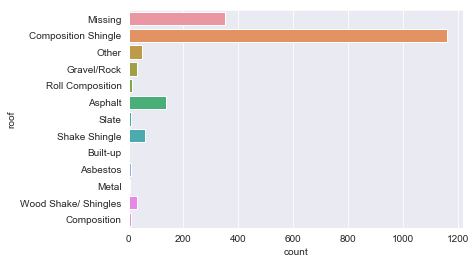

In [37]:
sns.countplot(y='roof', data = df)

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="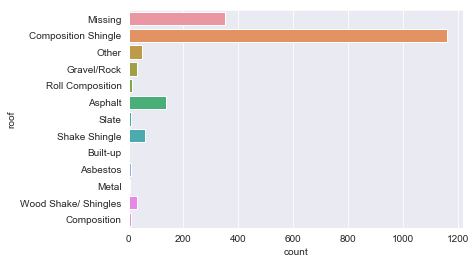&#10;">

As with the <code style="color:steelblue">'exterior_walls'</code> feature, we can start by grouping classes that are quite similar. 


#### B.) Group <code style="color:crimson">'Composition'</code> and <code style="color:crimson">'Wood Shake/ Shingles'</code> into the <code style="color:crimson">'Composition Shingle'</code> class.
* Remember to perform the replacing with <code style="color:steelblue">inplace=True</code>

In [38]:
df.roof.replace(['Composition','Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)

Next, let's group remaining sparse classes into a single <code style="color:crimson">'Other'</code> class.

#### C.) Label <code style="color:crimson">'Other'</code>, <code style="color:crimson">'Gravel/Rock'</code>, <code style="color:crimson">'Roll Composition'</code>, <code style="color:crimson">'Slate'</code>, <code style="color:crimson">'Built-up'</code>, <code style="color:crimson">'Asbestos'</code>, and <code style="color:crimson">'Metal'</code> as <code style="color:crimson">'Other'</code>.

In [39]:
# List of classes to group


# Group other classes into 'Other'
df.roof.replace(['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal'], 'Other', inplace=True)


#### D.) Finally, display bar plot again to confirm the new class distributions.

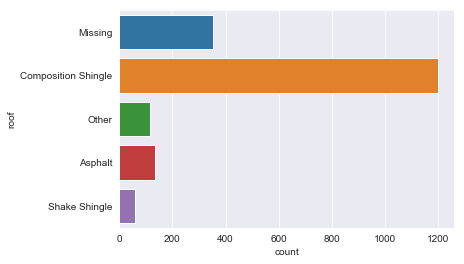

In [40]:
sns.countplot(y='roof',data=df)

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="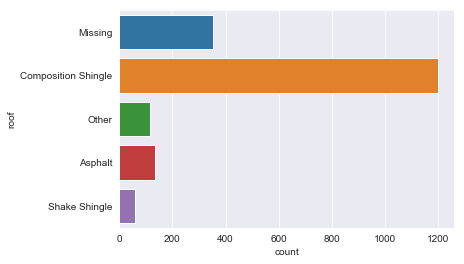&#10;">

## <span style="color:RoyalBlue">Exercise 3.6 - Finalizing Your ABT</span>

Before we move on, we'll need to finalize the table to use for modeling. In other words, this is the table that has already been cleaned and augmented through feature engineering, and we'll be performing our analyses or building our models on it. Therefore, we'll call it the **analytical base table (ABT)**.

#### Dummy Variables

Python machine learning algorithms cannot handle categorical features directly. Specifically, they cannot handle text data. Therefore, we need to create what are called **dummy variables** for our categorical features. 

#### Example: Roof

For example, for the <code style="color:steelblue">'roof'</code> feature (after grouping sparse classes), you would create 5 dummy variables:
* <code style="color:steelblue">'roof_Missing'</code>
* <code style="color:steelblue">'roof_Composition Shingle'</code>
* <code style="color:steelblue">'roof_Other'</code>
* <code style="color:steelblue">'roof_Asphalt'</code>
* <code style="color:steelblue">'roof_Shake Shingle'</code>

#### So if an observation had a roof made of <code style="color:crimson">'Composition Shingle'</code>, it would have the following values for the dummy variables:
* <code style="color:steelblue">'roof_Missing'</code> = <code style="color:crimson">0</code>
* <code style="color:steelblue">'roof_Composition Shingle'</code> = <strong><code style="color:black">1</code></strong>
* <code style="color:steelblue">'roof_Other'</code> = <code style="color:crimson">0</code>
* <code style="color:steelblue">'roof_Asphalt'</code> = <code style="color:crimson">0</code>
* <code style="color:steelblue">'roof_Shake Shingle'</code> = <code style="color:crimson">0</code>

#### A.) First, get dummy variables for the <code style="color:steelblue">'roof'</code> feature and then display the first 5 observations.
* **Tip:** Scroll to the right in the table below and look at the 5 new dummy variables created for <code style="color:steelblue">'roof'</code>.

In [47]:
pd.get_dummies(df, columns=['roof']).head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,recession,property_age,during_recession,school_score,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,1,27.0,0,0,1,0,0
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,0,9.0,0,1,0,0,0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,1,24.0,0,0,1,0,0
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,0,27.0,0,0,1,0,0
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,0,27.0,0,0,1,0,0


<strong style="color:RoyalBlue">Expected output:</strong>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>tx_price</th>
      <th>beds</th>
      <th>baths</th>
      <th>sqft</th>
      <th>year_built</th>
      <th>lot_size</th>
      <th>property_type</th>
      <th>exterior_walls</th>
      <th>basement</th>
      <th>restaurants</th>
      <th>groceries</th>
      <th>nightlife</th>
      <th>cafes</th>
      <th>shopping</th>
      <th>arts_entertainment</th>
      <th>beauty_spas</th>
      <th>active_life</th>
      <th>median_age</th>
      <th>married</th>
      <th>college_grad</th>
      <th>property_tax</th>
      <th>insurance</th>
      <th>median_school</th>
      <th>num_schools</th>
      <th>tx_year</th>
      <th>two_and_two</th>
      <th>during_recession</th>
      <th>property_age</th>
      <th>school_score</th>
      <th>roof_Asphalt</th>
      <th>roof_Composition Shingle</th>
      <th>roof_Missing</th>
      <th>roof_Other</th>
      <th>roof_Shake Shingle</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>295850</td>
      <td>1</td>
      <td>1</td>
      <td>584</td>
      <td>2013</td>
      <td>0</td>
      <td>Apartment / Condo / Townhouse</td>
      <td>Wood</td>
      <td>0.0</td>
      <td>107</td>
      <td>9</td>
      <td>30</td>
      <td>19</td>
      <td>89</td>
      <td>6</td>
      <td>47</td>
      <td>58</td>
      <td>33.0</td>
      <td>65.0</td>
      <td>84.0</td>
      <td>234.0</td>
      <td>81.0</td>
      <td>9.0</td>
      <td>3.0</td>
      <td>2013</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>27.0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>216500</td>
      <td>1</td>
      <td>1</td>
      <td>612</td>
      <td>1965</td>
      <td>0</td>
      <td>Apartment / Condo / Townhouse</td>
      <td>Brick</td>
      <td>1.0</td>
      <td>105</td>
      <td>15</td>
      <td>6</td>
      <td>13</td>
      <td>87</td>
      <td>2</td>
      <td>26</td>
      <td>14</td>
      <td>39.0</td>
      <td>73.0</td>
      <td>69.0</td>
      <td>169.0</td>
      <td>51.0</td>
      <td>3.0</td>
      <td>3.0</td>
      <td>2006</td>
      <td>0</td>
      <td>0</td>
      <td>41</td>
      <td>9.0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>279900</td>
      <td>1</td>
      <td>1</td>
      <td>615</td>
      <td>1963</td>
      <td>0</td>
      <td>Apartment / Condo / Townhouse</td>
      <td>Wood</td>
      <td>0.0</td>
      <td>183</td>
      <td>13</td>
      <td>31</td>
      <td>30</td>
      <td>101</td>
      <td>10</td>
      <td>74</td>
      <td>62</td>
      <td>28.0</td>
      <td>15.0</td>
      <td>86.0</td>
      <td>216.0</td>
      <td>74.0</td>
      <td>8.0</td>
      <td>3.0</td>
      <td>2012</td>
      <td>0</td>
      <td>1</td>
      <td>49</td>
      <td>24.0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>379900</td>
      <td>1</td>
      <td>1</td>
      <td>618</td>
      <td>2000</td>
      <td>33541</td>
      <td>Apartment / Condo / Townhouse</td>
      <td>Wood</td>
      <td>0.0</td>
      <td>198</td>
      <td>9</td>
      <td>38</td>
      <td>25</td>
      <td>127</td>
      <td>11</td>
      <td>72</td>
      <td>83</td>
      <td>36.0</td>
      <td>25.0</td>
      <td>91.0</td>
      <td>265.0</td>
      <td>92.0</td>
      <td>9.0</td>
      <td>3.0</td>
      <td>2005</td>
      <td>0</td>
      <td>0</td>
      <td>5</td>
      <td>27.0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>340000</td>
      <td>1</td>
      <td>1</td>
      <td>634</td>
      <td>1992</td>
      <td>0</td>
      <td>Apartment / Condo / Townhouse</td>
      <td>Brick</td>
      <td>0.0</td>
      <td>149</td>
      <td>7</td>
      <td>22</td>
      <td>20</td>
      <td>83</td>
      <td>10</td>
      <td>50</td>
      <td>73</td>
      <td>37.0</td>
      <td>20.0</td>
      <td>75.0</td>
      <td>88.0</td>
      <td>30.0</td>
      <td>9.0</td>
      <td>3.0</td>
      <td>2002</td>
      <td>0</td>
      <td>0</td>
      <td>10</td>
      <td>27.0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

#### B.) Next, create dummy variables for all of your categorical features at once and then save the new dataframe to a new object called <code>abt</code>.
* When you call <code>pd.get_dummies()</code>, it returns a new dataframe instead of updating the original one, so you'll either need to store it in a new object or overwrite the original one.
* **Tip:** The <code>columns=</code> argument takes a list of feature names.

In [48]:
abt = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

#### C.) As a sanity check, print the number of columns in your new <code>abt</code> object.

In [50]:
print(len(abt.columns))

43


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
42
</pre>

As a reminder, **redundant features** would typically be those that have been replaced by other features that you've added. For example, since we used <code style="color:steelblue">'tx_year'</code> and <code style="color:steelblue">'year_built'</code> to create the <code style="color:steelblue">'property_age'</code> feature, we might consider removing them. 
* Removing <code style="color:steelblue">'tx_year'</code> could also be a good idea because we don't want our model being overfit to the transaction year, since we'll be applying it to properties in the future. 
* In other words, we want the model to focus on learning patterns from the other features.


#### D.) Let's remove <code style="color:steelblue">'tx_year'</code> and <code style="color:steelblue">'year_built'</code> using Pandas's <code style="color:steelblue">.drop()</code> function.
* Remember that you have to set <code style="color:steelblue">axis=1</code> because you are dropping columns.
* Remember to do it 'inplace' as well.

In [54]:
abt.drop(['tx_year', 'year_built'], axis = 1, inplace = True)

#### E.) Save your analytical base table <code style="color:steelblue">'analytical_base_table.csv'</code>.

Before we move on to the next module, let's save the new dataframe we've cleaned and augmented through feature engineering.
* We'll use Pandas's <code style="color:steelblue">.to_csv()</code> function.
* Set <code style="color:steelblue">index=<span style="color:crimson">None</span></code> so that Pandas drops the indices and only stores the actual data in the CSV.

In [56]:
abt.to_csv('analytical_base_table.csv',index=None)

* Now we can use <code style="color:steelblue">'analytical_base_table.csv'</code> in all the other modules!

Congratulations for making through the Feature Engineering module! As a reminder, here are a few things you did in this module:
* You made several indicator features from domain knowledge.
* You created the interaction feature <code style="color:steelblue">'property_age'</code>.
* You grouped sparse classes in the <code style="color:steelblue">'exterior_walls'</code> and <code style="color:steelblue">'roof'</code> features.
* And you encoded dummy variables and saved the final analytical base table.

In the next module, we'll walk through intuition behind 5 of the most popular (and effective) machine learning algorithms for regression tasks.